# Assignment 2: Sentiment Classification Using Logistic Regression

## Programming Assignment (100 Points scaled to 40)

For this assignment we will be implementing a naive bayes baseline classifier. Additionally, we will be using pytorch to implement a binary logistic regression classifier. Our task is sentiment classification for hotel reviews. The input to your model will be a text review, and the output label is a 1 or 0 marking it as positive or negative.

We have provided a util.py file for loading the data, and some of the basic modeling. Your task is to fill in the functions below in order to train as accurate a classifier as possible!

We suggest browsing the util.py script first. Additionally, make sure to install dependencies from the provided requirements.txt file in a similar fashion to the pytorch tutorial. With your environment activated int he terminal, run:
```
pip install -r requirements.txt
```

In [2]:
from typing import List
import spacy
import torch
import random

2022-10-24 13:56:35.237340: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Section 1: Sentiment Classification Dataset (Total: 20 Points)

The training data for this task consists of a collection of short hotel reviews. The data is formatted as one review per line. Each line starts with a unique identifier for the review (as in ID-2001) followed by tab and the text of the review.  The reviews are not tokenized or sentence segmented in any way (the words are space separated). The positive reviews and negative reviews appear in separate files namely [hotelPosT-train.txt](data/hotelPosT-train.txt) and [hotelNegT-train.txt](data/hotelNegT-train.txt).

In [3]:
from util import load_train_data
pos_datapath = "data/hotelPosT-train.txt"
neg_datapath = "data/hotelNegT-train.txt"
all_texts, all_labels = load_train_data(pos_datapath, neg_datapath)

### Lets look at what is in the data

In [4]:
def random_sample(texts, labels, label):
    data_by_label = {}
    for lab, text in zip(labels, texts):
        if lab not in data_by_label:
            data_by_label[lab] = []
        data_by_label[lab].append(text)
    return random.choice(data_by_label[label])

print("--- Positive Example ---")
print(random_sample(all_texts, all_labels, label=1))
print("\n--- Negative Example ---")
print(random_sample(all_texts, all_labels, label=0))

--- Positive Example ---
I've stayed at the 16th Street Mall Westin more than 60 nights in the past four years, on a combined business/personal trips. The staff and management of the hotel have always been friendly and guest driven in their service.   Love the hotel's location. In fact the reason I first stayed at the hotel is the fact it's on the 16th Street Mall and within walking distance of our corporate office. In fact after the first trip I stopped renting a car, there just was no need for one. The view of the mountains from the upper floors is breathtaking. The king sized bed has always been world class, as they are in every Westin I've stayed at.  The room comfort and staff friendliness are the reason I stay at this hotel every trip to Denver.

--- Negative Example ---
I have stayed at The Inn At The Convention Center for a total of one week on separate occasions. First, if you can get past the curt responses of the near inhuman clerks in the front office, you will make your wa

### Test Data ( WAIT TILL DEADLINE)

This is the test dataset that you will need to use to report the results on. This set is the unseen dataset meaning, you are not in anyway supoose to look what is in this dataset. We will release this dataset on the last day of the assignment's deadline.

In [5]:
### RUN THIS ONLY ON DEADLINE ###
# Load the test data

from typing import List, Tuple, Any


def load_test_data(filepath: str) -> tuple[list[Any], list[Any]]:
    """Load the test data, producing a List of texts, labels

    Args:
        filepath (str): Path to the training file

    Returns:
        tuple[list[Any], list[Any]]: The texts and labels
    """
    lab_map = {'POS': 1, 'NEG': 0}
    texts = []
    labels = []
    with open(filepath, "r") as file:
        for line in file:
            idx, text, label = line.rstrip().split("\t")
            texts.append(text)
            labels.append(lab_map[label])

    return texts, labels


test_texts, test_labels = load_test_data('./data/HW2-testset.txt')

### Task 1.1: Print the number of "positive" and "negative" samples (5 Points)

It is important to know the distribution of the training examples. More often than not, you will have to work with datasets that are not "balanced" with respect to the labels of the samples. For this task, print out the number of examples that have label = 1 and label = 0, respectively, in std:out or plot a pie chart.

The number of examples that have label = 0:  94
The number of examples that have label = 1:  95


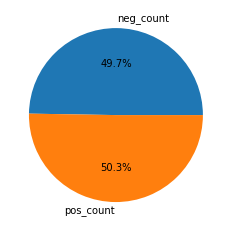

In [6]:
### ENTER CODE HERE ###
import matplotlib.pyplot as plt
import numpy as np
# Note since we have them in two seperate files, 
# this can also be done with bash commands
def label_distribution(labels):
    """
    TODO: Replace the line `raise NotImplementedError` with your code
    to print the labels distribution.
    """
    neg_count = pos_count = 0
    for num in labels:
        if num == 0:
            neg_count+=1;
        elif num == 1:
            pos_count+=1;
    print("The number of examples that have label = 0: ", neg_count)
    print("The number of examples that have label = 1: ", pos_count)
    
    y = np.array([neg_count, pos_count])
    mylabels = ["neg_count", "pos_count"]

    plt.pie(y, labels = mylabels, autopct='%.1f%%')
    plt.show()

label_distribution(all_labels)

### Task 1.2: Split Training and Development Sets (5 Points)

For the purpose of coming with the best parameters for the model you will have to split the dataset into training and development sets. Make sure the splits follow the same distribution.

Train Label Distribution:
The number of examples that have label = 0:  76
The number of examples that have label = 1:  75


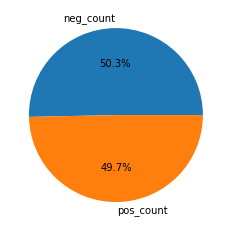

Dev Label Distribution:
The number of examples that have label = 0:  18
The number of examples that have label = 1:  20


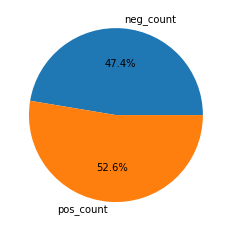

In [7]:
### ENTER CODE HERE ###
import numpy as np
import pandas as pd
def split_dataset(texts, labels):
    """
    Split the dataset randomly into 80% training and 20% development set
    Make sure the splits have the same label distribution
    """
    indices = list(range(len(texts)))
    num_training_indices = int(0.8 * len(texts))
    np.random.shuffle(indices)
    train_indices = indices[:num_training_indices]
    dev_indices = indices[num_training_indices:]
    # split the actual data
    train_texts, train_labels = texts.iloc[train_indices], labels.iloc[train_indices]
    dev_texts, dev_labels = texts.iloc[dev_indices], labels.iloc[dev_indices]
    return train_texts[0].values.tolist(), train_labels[0].values.tolist(), dev_texts[0].values.tolist(), dev_labels[0].values.tolist() 

train_texts = pd.DataFrame(all_texts)
train_labels = pd.DataFrame(all_labels)

train_texts, train_labels, dev_texts, dev_labels = split_dataset(train_texts, train_labels)

print('Train Label Distribution:')
label_distribution(train_labels)

print('Dev Label Distribution:')
label_distribution(dev_labels)

### Task 1.3: Evaluation Metrics (10 Points)

Implement the evaulation metrics: Accuracy, Precision, Recall and F1 score

In [8]:
### ENTER CODE HERE ###

def accuracy(predicted_labels, true_labels):
    """
    Accuracy is correct predictions / all predicitons
    """
    correct = 0
    for i in range(len(true_labels)):
        if predicted_labels[i] == true_labels[i]:
            correct += 1
    return correct / len(true_labels)

def precision(predicted_labels, true_labels):
    """
    Precision is True Positives / All Positives Predictions
    """
    TP = 0
    for i in range(len(true_labels)):
        if predicted_labels[i] == true_labels[i] and true_labels[i] == 1:
            TP += 1
    return TP / sum(predicted_labels)
    

def recall(predicted_labels, true_labels):
    """
    Recall is True Positives / All Positive Labels
    """
    TP = 0
    for i in range(len(true_labels)):
        if predicted_labels[i] == true_labels[i] and true_labels[i] == 1:
            TP += 1
    return TP / sum(true_labels)

def f1_score(predicted_labels, true_labels):
    """
    F1 score is the harmonic mean of precision and recall
    """
    prec = precision(predicted_labels, true_labels)
    reca = recall(predicted_labels, true_labels)
    return 2 * prec * reca / (prec + reca)

## Section 2: Baselines (Total: 20 Points)

It is important to come up with baselines for the classifications to compare the more complicated models with. The baselines are also useful as a debugging method for your actual classfication model. You will create two baselines:

1. Random Chance
2. Naive Bayes Classifier

### Task 2.1: Random Chance Classifier (5 Points)

A random chance classifier predicts the label according to the label's distribution. As an example, if the label 1 appears 70% of the times in the training set, you predict 70 out of 100 times the label 1 and label 0 30% of the times

In [9]:
### ENTER CODE HERE ###

def predict_random(train_labels, num_samples):
    result = np.random.choice([0, 1], size=num_samples, 
                     p=[1 - (sum(train_labels)/len(train_labels)), sum(train_labels)/len(train_labels)])
    return result

### Task 2.2: Naive Bayes Classifier (Total: 10 Points)

In the class, Jim went over how to implement a Naive Bayes Classifier using the tokens in the training samples.
In this task, you will do the same. As a preprocessing step, you might want to remove the stop words and lemmatize/stem the words of the texts. 

### Spacy Model https://spacy.io

To tokenize the text and help extract features from text, we will use the popular spaCy model

In [10]:
### DO NOT EDIT ###

# Initialize the spacy model
nlp = spacy.load('en_core_web_sm')

### Task 2.2.1: Play around with spacy (0 Points)

In [11]:
### ENTER CODE HERE ###

test_string = "This is an amazing sentence"

# parse the string with spacy model
test_doc = nlp(test_string)

print('Token', 'Lemma', 'Is_Stopword?')
for token in test_doc:
    print(token, token.lemma_, token.is_stop)

Token Lemma Is_Stopword?
This this True
is be True
an an True
amazing amazing False
sentence sentence False


### Task 2.2.2: Preprocessing (5 Points)

Remove stopwords and lemmatize the words of a text

In [12]:
### ENTER CODE HERE ###

def pre_process(text: str) -> List[str]:
    """
    remove stopwords and lemmatize and return an array of lemmas
    """
    my_doc = nlp(text)

    lemma_nonstop = []
    
    for token in my_doc:
        if token.is_stop == False:
            lemma_nonstop.append(token.lemma_)
    return lemma_nonstop
    
test_string = "This sentence needs to be lemmatized"

assert len({'sentence', 'need', 'lemmatize', 'lemmatiz'}.intersection(pre_process(test_string))) >= 3

print('All Test Cases Passed!')

All Test Cases Passed!


### Task 2.2.3: The Naive Bayes Class (5 Points)

The standard way of implementing classifiers like Naive Bayes is to implement the two methods: "fit" and "predict". The fit method expects the training data along with labels, and the predict method predicts the labels for the provides texts of samples.

In [13]:
### ENTER CODE HERE ###
import operator
import math 
class NaiveBayesClassifier:
    def __init__(self, num_classes):
        self.num_classes = num_classes
        self.label_words_count_pos = dict()
        self.label_words_count_neg = dict()
    
    def fit(self, texts, labels):
        """
        1. Group samples by their labels
        2. Preprocess each text
        3. Count the words of the text for each label
        """
        
        for i in range(len(texts)):
            
            vector = texts[i]
            class_value = int(labels[i])
            
            words = pre_process(vector)
            
            if (class_value == 1):
                for word in words:
                    self.label_words_count_pos[word] = self.label_words_count_pos.get(word, 0) + 1
            elif (class_value == 0):
                for word in words:
                    self.label_words_count_neg[word] = self.label_words_count_neg.get(word, 0) + 1
        
    def predict(self, texts):
        """
        1. Preprocess the texts
        2. Predict the class by using the likelihood with Bayes Method and Laplace Smoothing
        """

        pos_count_sum = sum(self.label_words_count_pos.values())
        neg_count_sum = sum(self.label_words_count_neg.values())
        
        label_words_prob_pos = self.label_words_count_pos.copy()
        label_words_prob_neg = self.label_words_count_neg.copy()
        
        label_words_prob_pos = {key: value / pos_count_sum for key, value in label_words_prob_pos.items()}
        label_words_prob_neg = {key: value / neg_count_sum for key, value in label_words_prob_neg.items()}
        
        result = []
        
        for i in range(len(texts)):
            
            vector = texts[i]
            words = pre_process(vector)
            
            pos_score = 0
            neg_score = 0
            
            for word in words:
                
                if word in self.label_words_count_pos:
                    pos_score += math.log(label_words_prob_pos[word]) 
                elif word not in self.label_words_count_pos:
                    pos_score += math.log(float(1/pos_count_sum))
                    
                if word in self.label_words_count_neg:
                    neg_score += math.log(label_words_prob_neg[word]) 
                elif word not in self.label_words_count_neg:
                    neg_score += math.log(float(1/neg_count_sum))
                    
            if pos_score > neg_score:
                result.append(1)
            else:
                result.append(0)
                
        return result

### Task 2.3: Baseline Results  (5 Points)

Since there is not hyperparameter-tuing required for the baselines, we can use the entirety of the training set (no need to split the dataset into train and development). Report the results you achieve with the two baselines by running the following cell:

In [14]:
### DO NOT EDIT ###

### DEV SET RESULTS
testset_prediction_random = predict_random(train_labels, num_samples=len(dev_labels))
print('Random Chance F1:', f1_score(testset_prediction_random, dev_labels))

naive_bayes_classifier = NaiveBayesClassifier(num_classes=2)
naive_bayes_classifier.fit(train_texts, train_labels)
testset_predictions_nb = naive_bayes_classifier.predict(dev_texts)
print('Naive Bayes F1:', f1_score(testset_predictions_nb, dev_labels))

Random Chance F1: 0.5714285714285713
Naive Bayes F1: 0.975609756097561


In [15]:
### DO NOT EDIT ###
### RUN THIS ONLY ON DEADLINE ###
### TEST SET RESULTS

testset_prediction_random = predict_random(all_labels, num_samples=len(test_labels))
print('Random Chance F1:', f1_score(testset_prediction_random, test_labels))

naive_bayes_classifier = NaiveBayesClassifier(num_classes=2)
naive_bayes_classifier.fit(all_texts, all_labels)
testset_predictions_nb = naive_bayes_classifier.predict(test_texts)
print('Naive Bayes F1:', f1_score(testset_predictions_nb, test_labels))

Random Chance F1: 0.47058823529411764
Naive Bayes F1: 0.9019607843137256


## Section 3: Logistic Regression on Features (Total: 60 Points)

Now let's try building a logistic regression based classifier on hand-engineered features.

The following tasks are going to be the implementation of the components required in building a Logistic Regressor.

### Task 3.0: Feature Extraction (20 points)

This is perhaps the most challenging part of this assignment. In the class, we went over how to featurize text for a classification system for sentiment analysis. In this assignment, you should implement and build upon this to accuractely classify the hotel reviews.

This task requires a thorough understanding of the dataset to answer the important question, "What is in the data?". Please go through some of the datapoints and convert the signals that you think might help in identifying "sentiment" as features.

Please refer to the section in Jim's book that illustrates the process of feature engineering for this task. We have attached an image of the table below:

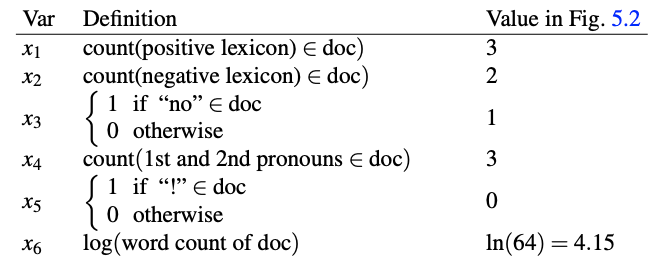

Please use the files with postive and negative words attached in the assignment: [positive_words.txt](data/poisitive-words.txt) and  [negative_words.txt](data/negative-words.txt)

In [16]:
from util import load_train_data
pos_datapath = "data/positive-words.txt"
neg_datapath = "data/negative-words.txt"

my_file = open(pos_datapath, "r")
content = my_file.read()
pos_lex = content.split("\n")
my_file.close()

my_file = open(neg_datapath, "r")
content = my_file.read()
neg_lex = content.split("\n")
my_file.close()

def make_test_feature_1(text: spacy.tokens.doc.Doc):
    count = 0
    for t in text:
        tem = t.lemma_
        if t.lemma_ in pos_lex:
            count += 1
    return count
        
def make_test_feature_2(text: spacy.tokens.doc.Doc):
    count = 0 
    for t in text:
        if t.lemma_ in neg_lex:
            count += 1
    return count
        
def make_test_feature_3(text: spacy.tokens.doc.Doc):
    count = 0
    for t in text:
        if t.lemma_ == 'no':
            count += 1
    return count
        
def make_test_feature_4(text: spacy.tokens.doc.Doc):
    count = 0
    pronouns = ['I', 'me', 'my', 'My' , 'mine', 'myself', 'You', 'you', 'your', 'Your', 'yours', 'yourself']
    for t in text:
        if t.lemma_ in pronouns:
            count += 1
    return count
        
def make_test_feature_5(text: spacy.tokens.doc.Doc):
    count = 0
    for t in text:
        if t.lemma_ == '!':
            count += 1
    return count
        
def make_test_feature_6(text: spacy.tokens.doc.Doc):
    count = 0
    for t in text:
        count += 1
    return np.log(count)


def extract_features(text: spacy.tokens.doc.Doc):
    features = []
    # TODO: Replace this with your own feature extraction functions.
    # TODO: add more features to the feature vector
    features.append(make_test_feature_1(text))
    features.append(make_test_feature_2(text))
    features.append(make_test_feature_3(text))
    features.append(make_test_feature_4(text))
    features.append(make_test_feature_5(text))
    features.append(make_test_feature_6(text))

    return features

In [17]:
### ENTER CODE HERE ###
### DO NOT CHANGE THE SIGNATURE OF THE function THOUGH ###

def featurize_data(texts, labels):
    features = [
        extract_features(doc) for doc in nlp.pipe(texts)
    ]
    return torch.FloatTensor(features), torch.FloatTensor(labels)

### Task 3.0.2: Feature Scaling (10 Points)

In this task we will use the data normalization technique to ensure the scales of the feature are consistent.
After featurizing the dataset, we need to call the following function before passing it to the classifier

#### Normalization Formula

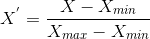

In [18]:
### ENTER CODE HERE ###

def normalize(features: torch.Tensor) -> torch.Tensor:
    """
    return the features transformed by the above formula of normalization
    """
    feature_min = torch.min(features) 
    feature_max = torch.max(features) 
    for row in range(features.shape[0]):
        for col in range(features.shape[1]):
            features[row][col] = (features[row][col].item() - feature_min) / (feature_max - feature_min)
    return features

## Training a Logistic Regression Classifier (Total: 30 Points)

In this section, you will implement the components needed to train the binary classifier using logistic regression

### Here we define our pytorch logistic regression classifier (DO NOT EDIT THIS)

In [19]:
class SentimentClassifier(torch.nn.Module):
    def __init__(self, input_dim: int):
        super().__init__()
        # We force output to be one, since we are doing binary logistic regression
        self.output_size = 1
        self.coefficients = torch.nn.Linear(input_dim, self.output_size)
        # Initialize weights. Note that this is not strictly necessary,
        # but you should test different initializations per lecture
        initialize_weights(self.coefficients)
        
    def forward(self, features: torch.Tensor):
        # We predict a number by multipling by the coefficients
        # and then take the sigmoid to turn the score as logits
        return torch.sigmoid(self.coefficients(features))

### Task 3.1: Initialize the weights. (5 Points)

Initialization of the parameters is an important step to ensure the SGD algorithm converges to a global optimum. Typically, we need to try different initialization methods and compare the accuracy we achieve for the development set. In this task, implement the function that initializes the parameters to ...

In [20]:
### ENTER CODE HERE ###
import math
def initialize_weights(coefficients):
    """
    TODO: Replace the line `raise NotImplementedError` with your code.
    Initialize the weights of the coefficients by assigning the parameter
    coefficients.weights.data = ...
    """
    return torch.nn.init.xavier_uniform_(coefficients.weight)

Let's build a training function similar to the linear regressor from the tutorial

### Task 3.2: Logistic Loss Function (10 Points)

In [21]:
### ENTER CODE HERE ###

def logistic_loss(prediction: torch.Tensor, label: torch.Tensor) -> torch.Tensor:
    """ 
    TODO: Implement the logistic loss function between a prediction and label.
    """
    l1 = torch.nn.BCEWithLogitsLoss()
    return l1(prediction, label)

### Task 3.3: Create an SGD optimizer (0 Points)

We have already provided the implementation of how to create the SGD optimizer

You may try different optimizers refering to the docs provided

In [22]:
### ENTER CODE HERE ###

def make_optimizer(model, learning_rate) -> torch.optim:
    """
    Returns an Stocastic Gradient Descent Optimizer
    See here for algorithms you can import: https://pytorch.org/docs/stable/optim.html
    """
    return torch.optim.SGD(model.parameters(), learning_rate)

### Task 3.5: Converting Logits into Predictions (5 Points)

In [23]:
### ENTER CODE HERE ###

def predict(model, features):
    with torch.no_grad():
        """
        TODO: Replace the line `raise NotImplementedError`
        with the logic of converting the logits into prediction labels (0, 1)
        """
        logits = model(features)
        return torch.round(logits)

### Training Function (DO NOT EDIT THIS)

In [30]:
### DO NOT EDIT ###

from tqdm.autonotebook import tqdm
import random


def training_loop(
    num_epochs,
    batch_size,
    train_features,
    train_labels,
    dev_features,
    dev_labels,
    optimizer,
    model
):
    samples = list(zip(train_features, train_labels))
    random.shuffle(samples)
    batches = []
    for i in range(0, len(samples), batch_size):
        batches.append(samples[i:i+batch_size])
    print("Training...")
    for i in range(num_epochs):
        losses = []
        for batch in tqdm(batches):
            # Empty the dynamic computation graph
            features, labels = zip(*batch)
            print(type(features))
            features = torch.stack(features)
            labels = torch.stack(labels)
            print(features)
            optimizer.zero_grad()
            # Run the model
            logits = model(features)
            print('1',logits)
            # Compute loss
            loss = logistic_loss(torch.squeeze(logits), labels)
            print('2',torch.squeeze(logits))
            print('3',loss)
            print('4',labels)
            # In this logistic regression example,
            # this entails computing a single gradient
            loss.backward()
            # Backpropogate the loss through our model
            
            # Update our coefficients in the direction of the gradient.
            optimizer.step()
             # For logging
            losses.append(loss.item())
        
        # Estimate the f1 score for the development set
        dev_f1 = f1_score(predict(model, dev_features), dev_labels)
        print(f"epoch {i}, loss: {sum(losses)/len(losses)}")
        print(f"Dev F1 {dev_f1}")
        
    # Return the trained model
    return model

### Task 3.6: Train the classifier (10 Points)

Run the following cell to train a logistic regressor on your hand-engineered features.

In [31]:
num_epochs = 500

train_features, train_labels_tensor = featurize_data(train_texts, train_labels)
train_features = normalize(train_features)
dev_features, dev_labels_tensor = featurize_data(dev_texts, dev_labels)
dev_features = normalize(dev_features)
model = SentimentClassifier(train_features.shape[1]) 
optimizer = make_optimizer(model, learning_rate=0.5)

trained_model = training_loop(
    num_epochs,
    16,
    train_features,
    train_labels_tensor,
    dev_features,
    dev_labels_tensor,
    optimizer,
    model
)

Training...


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4372],
        [0.4121],
        [0.4075],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4090],
        [0.3863],
        [0.3791],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3841],
        [0.3635],
        [0.3540],

Dev F1 tensor([nan])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3621],
        [0.3435],
        [0.3318],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3429],
        [0.3259],
        [0.3124],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3260],
        [0.3105],
        [0.2953],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3113],
        [0.2971],
        [0.2803],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2983],
        [0.2853],
        [0.2671],

1 tensor([[0.2682],
        [0.2652],
        [0.2551],
        [0.2531],
        [0.2783],
        [0.2608],
        [0.2756]], grad_fn=<SigmoidBackward0>)
2 tensor([0.2682, 0.2652, 0.2551, 0.2531, 0.2783, 0.2608, 0.2756],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6455, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 1., 0., 1., 0., 1., 1.])
epoch 7, loss: 0.6985478103160858
Dev F1 tensor([nan])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2869],
        [0.2749],
        [0.2554],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2769],
        [0.2657],
        [0.2451],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2681],
        [0.2576],
        [0.2359],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2604],
        [0.2505],
        [0.2277],

tensor([[0.2647, 0.0294, 0.0000, 0.2059, 0.0000, 0.1493],
        [0.0000, 0.0882, 0.0000, 0.0000, 0.0000, 0.1037],
        [0.2059, 0.0000, 0.0000, 0.0294, 0.0294, 0.1245],
        [0.1471, 0.2941, 0.0000, 0.1471, 0.0000, 0.1445],
        [0.2941, 0.2647, 0.0294, 0.2353, 0.0000, 0.1605],
        [0.0882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0969],
        [0.0294, 0.0882, 0.0000, 0.2059, 0.0000, 0.1483],
        [0.1765, 0.0000, 0.0000, 0.0294, 0.0882, 0.1285],
        [0.1176, 0.1765, 0.0000, 0.0294, 0.0294, 0.1401],
        [0.2941, 0.0000, 0.0000, 0.1176, 0.0000, 0.1354],
        [0.0000, 0.1471, 0.0000, 0.0294, 0.0000, 0.0990],
        [0.5882, 0.0000, 0.0000, 0.1471, 0.0000, 0.1673],
        [0.0294, 0.2059, 0.0000, 0.1471, 0.0000, 0.1307],
        [0.1471, 0.0000, 0.0000, 0.2059, 0.0000, 0.1357],
        [0.1765, 0.0294, 0.0000, 0.3235, 0.0588, 0.1476],
        [0.1176, 0.2941, 0.0294, 0.3529, 0.0588, 0.1505]])
1 tensor([[0.2467],
        [0.2293],
        [0.2413],
        [0.2107

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2535],
        [0.2442],
        [0.2204],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2475],
        [0.2386],
        [0.2139],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2421],
        [0.2337],
        [0.2080],

2 tensor([0.2323, 0.1964, 0.2224, 0.2030, 0.2203, 0.2050, 0.1969, 0.1971, 0.2068,
        0.2289, 0.2309, 0.2079, 0.2300, 0.2242, 0.2200, 0.1876],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.7200, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.])
<class 'tuple'>
tensor([[0.2647, 0.0294, 0.0000, 0.2059, 0.0000, 0.1493],
        [0.0000, 0.0882, 0.0000, 0.0000, 0.0000, 0.1037],
        [0.2059, 0.0000, 0.0000, 0.0294, 0.0294, 0.1245],
        [0.1471, 0.2941, 0.0000, 0.1471, 0.0000, 0.1445],
        [0.2941, 0.2647, 0.0294, 0.2353, 0.0000, 0.1605],
        [0.0882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0969],
        [0.0294, 0.0882, 0.0000, 0.2059, 0.0000, 0.1483],
        [0.1765, 0.0000, 0.0000, 0.0294, 0.0882, 0.1285],
        [0.1176, 0.1765, 0.0000, 0.0294, 0.0294, 0.1401],
        [0.2941, 0.0000, 0.0000, 0.1176, 0.0000, 0.1354],
        [0.0000, 0.1471, 0.0000, 0.0294, 0.0000, 0.0990],
        [0.5882, 0.0000

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2374],
        [0.2294],
        [0.2028],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2333],
        [0.2255],
        [0.1981],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2297],
        [0.2221],
        [0.1939],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2265],
        [0.2192],
        [0.1900],

1 tensor([[0.2152],
        [0.1841],
        [0.1924],
        [0.1925],
        [0.2207],
        [0.2076],
        [0.2142],
        [0.2147],
        [0.2050],
        [0.1840],
        [0.2035],
        [0.1751],
        [0.2019],
        [0.1959],
        [0.2116],
        [0.2180]], grad_fn=<SigmoidBackward0>)
2 tensor([0.2152, 0.1841, 0.1924, 0.1925, 0.2207, 0.2076, 0.2142, 0.2147, 0.2050,
        0.1840, 0.2035, 0.1751, 0.2019, 0.1959, 0.2116, 0.2180],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6932, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.])
<class 'tuple'>
tensor([[0.1471, 0.0000, 0.0000, 0.0294, 0.0000, 0.1274],
        [0.4118, 0.0294, 0.0294, 0.2059, 0.0294, 0.1491],
        [0.0588, 0.2059, 0.0000, 0.1176, 0.0000, 0.1363],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1339],
        [0.2941, 0.0000, 0.0000, 0.1765, 0.0588, 0.1456],
        [0.3824, 0.0000, 0.0000, 0.0882, 0.0000, 0.1

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2237],
        [0.2166],
        [0.1866],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2214],
        [0.2143],
        [0.1835],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2193],
        [0.2124],
        [0.1808],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2176],
        [0.2107],
        [0.1783],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2162],
        [0.2094],
        [0.1761],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2151],
        [0.2083],
        [0.1741],

<class 'tuple'>
tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1441],
        [0.2647, 0.0000, 0.0000, 0.0882, 0.0000, 0.1285],
        [0.3235, 0.0000, 0.0000, 0.0882, 0.0000, 0.1300],
        [0.3529, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.1176, 0.2059, 0.0000, 0.0588, 0.0294, 0.1480],
        [0.1176, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.0882, 0.2647, 0.0000, 0.0882, 0.0000, 0.1509],
        [0.0294, 0.0882, 0.0294, 0.1765, 0.0000, 0.1285],
        [0.0882, 0.1176, 0.0294, 0.0588, 0.0588, 0.1281],
        [0.1471, 0.0000, 0.0000, 0.0588, 0.0000, 0.1278],
        [0.2647, 0.0000, 0.0000, 0.1471, 0.0000, 0.1323]])
1 tensor([[0.2097],
        [0.1696],
        [0.1762],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2142],
        [0.2074],
        [0.1724],

epoch 25, loss: 0.6889126658439636
Dev F1 tensor([nan])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2136],
        [0.2067],
        [0.1708],

2 tensor([0.1982, 0.2181, 0.1643, 0.2000, 0.2205, 0.2145, 0.2067],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6517, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 1., 0., 1., 0., 1., 1.])
epoch 26, loss: 0.688581508398056
Dev F1 tensor([nan])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2132],
        [0.2062],
        [0.1695],

tensor([[0.1471, 0.0000, 0.0000, 0.0294, 0.0000, 0.1274],
        [0.4118, 0.0294, 0.0294, 0.2059, 0.0294, 0.1491],
        [0.0588, 0.2059, 0.0000, 0.1176, 0.0000, 0.1363],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1339],
        [0.2941, 0.0000, 0.0000, 0.1765, 0.0588, 0.1456],
        [0.3824, 0.0000, 0.0000, 0.0882, 0.0000, 0.1451],
        [0.2353, 0.0588, 0.0000, 0.2647, 0.0000, 0.1511]])
1 tensor([[0.1978],
        [0.2190],
        [0.1629],
        [0.2003],
        [0.2209],
        [0.2153],
        [0.2066]], grad_fn=<SigmoidBackward0>)
2 tensor([0.1978, 0.2190, 0.1629, 0.2003, 0.2209, 0.2153, 0.2066],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6515, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 1., 0., 1., 0., 1., 1.])
epoch 27, loss: 0.6882541596889495
Dev F1 tensor([nan])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2130],
        [0.2060],
        [0.1683],

epoch 28, loss: 0.687929505109787
Dev F1 tensor([nan])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2130],
        [0.2059],
        [0.1673],

1 tensor([[0.2169],
        [0.1484],
        [0.1816],
        [0.1696],
        [0.1981],
        [0.1656],
        [0.1525],
        [0.1547],
        [0.1825],
        [0.2034],
        [0.2153],
        [0.1647],
        [0.2022],
        [0.1995],
        [0.1835],
        [0.1461]], grad_fn=<SigmoidBackward0>)
2 tensor([0.2169, 0.1484, 0.1816, 0.1696, 0.1981, 0.1656, 0.1525, 0.1547, 0.1825,
        0.2034, 0.2153, 0.1647, 0.2022, 0.1995, 0.1835, 0.1461],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.7102, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.])
<class 'tuple'>
tensor([[0.2647, 0.0294, 0.0000, 0.2059, 0.0000, 0.1493],
        [0.0000, 0.0882, 0.0000, 0.0000, 0.0000, 0.1037],
        [0.2059, 0.0000, 0.0000, 0.0294, 0.0294, 0.1245],
        [0.1471, 0.2941, 0.0000, 0.1471, 0.0000, 0.1445],
        [0.2941, 0.2647, 0.0294, 0.2353, 0.0000, 0.1605],
        [0.0882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2132],
        [0.2060],
        [0.1665],

2 tensor([0.2123, 0.1627, 0.1678, 0.1695, 0.2631, 0.2045, 0.2089, 0.2131, 0.2038,
        0.1630, 0.1882, 0.1512, 0.1794, 0.1758, 0.1991, 0.2127],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6873, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.])
<class 'tuple'>
tensor([[0.1471, 0.0000, 0.0000, 0.0294, 0.0000, 0.1274],
        [0.4118, 0.0294, 0.0294, 0.2059, 0.0294, 0.1491],
        [0.0588, 0.2059, 0.0000, 0.1176, 0.0000, 0.1363],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1339],
        [0.2941, 0.0000, 0.0000, 0.1765, 0.0588, 0.1456],
        [0.3824, 0.0000, 0.0000, 0.0882, 0.0000, 0.1451],
        [0.2353, 0.0588, 0.0000, 0.2647, 0.0000, 0.1511]])
1 tensor([[0.1975],
        [0.2229],
        [0.1596],
        [0.2024],
        [0.2231],
        [0.2189],
        [0.2072]], grad_fn=<SigmoidBackward0>)
2 tensor([0.1975, 0.2229, 0.1596, 0.2024, 0.2231, 0.2189, 0.2072],
       grad_fn=<SqueezeBackwar

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2136],
        [0.2062],
        [0.1658],

3 tensor(0.7029, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.])
<class 'tuple'>
tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1441],
        [0.2647, 0.0000, 0.0000, 0.0882, 0.0000, 0.1285],
        [0.3235, 0.0000, 0.0000, 0.0882, 0.0000, 0.1300],
        [0.3529, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.1176, 0.2059, 0.0000, 0.0588, 0.0294, 0.1480],
        [0.1176, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.0882, 0.2647, 0.0000, 0.0882, 0.0000, 0.1509],
        [0.0294, 0.0882, 0.0294, 0.1765, 0.0000, 0.1285],
        [0.0882, 0.1176, 0.0294, 0.0588, 0.0588, 0.1281],
        [0.1471, 0.0000, 0.0000

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2142],
        [0.2066],
        [0.1652],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2149],
        [0.2072],
        [0.1648],

<class 'tuple'>
tensor([[0.1471, 0.0000, 0.0000, 0.0294, 0.0000, 0.1274],
        [0.4118, 0.0294, 0.0294, 0.2059, 0.0294, 0.1491],
        [0.0588, 0.2059, 0.0000, 0.1176, 0.0000, 0.1363],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1339],
        [0.2941, 0.0000, 0.0000, 0.1765, 0.0588, 0.1456],
        [0.3824, 0.0000, 0.0000, 0.0882, 0.0000, 0.1451],
        [0.2353, 0.0588, 0.0000, 0.2647, 0.0000, 0.1511]])
1 tensor([[0.1985],
        [0.2285],
        [0.1575],
        [0.2060],
        [0.2270],
        [0.2241],
        [0.2093]], grad_fn=<SigmoidBackward0>)
2 tensor([0.1985, 0.2285, 0.1575, 0.2060, 0.2270, 0.2241, 0.2093],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6499, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 1., 0., 1., 0., 1., 1.])
epoch 33, loss: 0.6863156318664551
Dev F1 tensor([nan])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2158],
        [0.2079],
        [0.1644],

epoch 34, loss: 0.6859897315502167
Dev F1 tensor([nan])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2169],
        [0.2087],
        [0.1642],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2181],
        [0.2097],
        [0.1641],

        [0.1176, 0.3235, 0.0000, 0.0588, 0.0000, 0.1574]])
1 tensor([[0.2271],
        [0.1415],
        [0.1791],
        [0.1688],
        [0.2035],
        [0.1620],
        [0.1467],
        [0.1508],
        [0.1878],
        [0.2076],
        [0.2256],
        [0.1598],
        [0.2053],
        [0.2039],
        [0.1831],
        [0.1412]], grad_fn=<SigmoidBackward0>)
2 tensor([0.2271, 0.1415, 0.1791, 0.1688, 0.2035, 0.1620, 0.1467, 0.1508, 0.1878,
        0.2076, 0.2256, 0.1598, 0.2053, 0.2039, 0.1831, 0.1412],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.7082, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.])
<class 'tuple'>
tensor([[0.2647, 0.0294, 0.0000, 0.2059, 0.0000, 0.1493],
        [0.0000, 0.0882, 0.0000, 0.0000, 0.0000, 0.1037],
        [0.2059, 0.0000, 0.0000, 0.0294, 0.0294, 0.1245],
        [0.1471, 0.2941, 0.0000, 0.1471, 0.0000, 0.1445],
        [0.2941, 0.2647, 0.0294, 0.2353, 0.0000, 0.

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2194],
        [0.2108],
        [0.1641],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2209],
        [0.2121],
        [0.1642],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2226],
        [0.2134],
        [0.1644],

tensor([[0.2647, 0.0294, 0.0000, 0.2059, 0.0000, 0.1493],
        [0.0000, 0.0882, 0.0000, 0.0000, 0.0000, 0.1037],
        [0.2059, 0.0000, 0.0000, 0.0294, 0.0294, 0.1245],
        [0.1471, 0.2941, 0.0000, 0.1471, 0.0000, 0.1445],
        [0.2941, 0.2647, 0.0294, 0.2353, 0.0000, 0.1605],
        [0.0882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0969],
        [0.0294, 0.0882, 0.0000, 0.2059, 0.0000, 0.1483],
        [0.1765, 0.0000, 0.0000, 0.0294, 0.0882, 0.1285],
        [0.1176, 0.1765, 0.0000, 0.0294, 0.0294, 0.1401],
        [0.2941, 0.0000, 0.0000, 0.1176, 0.0000, 0.1354],
        [0.0000, 0.1471, 0.0000, 0.0294, 0.0000, 0.0990],
        [0.5882, 0.0000, 0.0000, 0.1471, 0.0000, 0.1673],
        [0.0294, 0.2059, 0.0000, 0.1471, 0.0000, 0.1307],
        [0.1471, 0.0000, 0.0000, 0.2059, 0.0000, 0.1357],
        [0.1765, 0.0294, 0.0000, 0.3235, 0.0588, 0.1476],
        [0.1176, 0.2941, 0.0294, 0.3529, 0.0588, 0.1505]])
1 tensor([[0.2247],
        [0.1659],
        [0.2138],
        [0.1505

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2243],
        [0.2149],
        [0.1647],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2262],
        [0.2164],
        [0.1651],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2281],
        [0.2181],
        [0.1655],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2302],
        [0.2199],
        [0.1660],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2324],
        [0.2217],
        [0.1665],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2347],
        [0.2236],
        [0.1672],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2371],
        [0.2257],
        [0.1678],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2396],
        [0.2278],
        [0.1686],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2421],
        [0.2299],
        [0.1693],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2448],
        [0.2322],
        [0.1701],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2475],
        [0.2345],
        [0.1710],

2 tensor([0.2224, 0.2857, 0.1597, 0.2475, 0.2721, 0.2782, 0.2418],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6405, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 1., 0., 1., 0., 1., 1.])
epoch 50, loss: 0.6802725911140441
Dev F1 tensor([nan])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2502],
        [0.2368],
        [0.1718],

tensor([[0.1471, 0.0000, 0.0000, 0.0294, 0.0000, 0.1274],
        [0.4118, 0.0294, 0.0294, 0.2059, 0.0294, 0.1491],
        [0.0588, 0.2059, 0.0000, 0.1176, 0.0000, 0.1363],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1339],
        [0.2941, 0.0000, 0.0000, 0.1765, 0.0588, 0.1456],
        [0.3824, 0.0000, 0.0000, 0.0882, 0.0000, 0.1451],
        [0.2353, 0.0588, 0.0000, 0.2647, 0.0000, 0.1511]])
1 tensor([[0.2244],
        [0.2901],
        [0.1602],
        [0.2508],
        [0.2756],
        [0.2824],
        [0.2444]], grad_fn=<SigmoidBackward0>)
2 tensor([0.2244, 0.2901, 0.1602, 0.2508, 0.2756, 0.2824, 0.2444],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6398, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 1., 0., 1., 0., 1., 1.])
epoch 51, loss: 0.6798791408538818
Dev F1 tensor([nan])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2530],
        [0.2392],
        [0.1727],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2559],
        [0.2416],
        [0.1736],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2588],
        [0.2441],
        [0.1745],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2617],
        [0.2466],
        [0.1755],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2647],
        [0.2491],
        [0.1764],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2676],
        [0.2517],
        [0.1773],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2706],
        [0.2542],
        [0.1782],

<class 'tuple'>
tensor([[0.1765, 0.0000, 0.0294, 0.3824, 0.0588, 0.1480],
        [0.0882, 0.2941, 0.0000, 0.0294, 0.0000, 0.1354],
        [0.1176, 0.2059, 0.0000, 0.1765, 0.0000, 0.1596],
        [0.1765, 0.1176, 0.0000, 0.3235, 0.0000, 0.1545],
        [0.1765, 0.1765, 0.0294, 0.0882, 0.0294, 0.1524],
        [0.1765, 0.1176, 0.0294, 0.2941, 0.0000, 0.1476],
        [0.5588, 0.1471, 0.0000, 0.4706, 0.0000, 0.1682],
        [0.0588, 0.0294, 0.0000, 0.0294, 0.0000, 0.1270],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1464],
        [0.0588, 0.1765, 0.0588, 0.1176, 0.0294, 0.1485],
        [0.2353, 0.0294, 0.0000, 0.1471, 0.0588, 0.1330],
        [0.1765, 0.0294, 0.0000, 0.0588, 0.0000, 0.1245],
        [0.2647, 0.0294, 0.0000, 0.2941, 0.0882, 0.1545],
        [0.0588, 0.0882, 0.0000, 0.0588, 0.0000, 0.1126],
        [0.1471, 0.0294, 0.0294, 0.0588, 0.0000, 0.1366],
        [0.1471, 0.0294, 0.0000, 0.0882, 0.0000, 0.1173]])
1 tensor([[0.2840],
        [0.1436],
        [0.1824],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2736],
        [0.2568],
        [0.1792],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2766],
        [0.2593],
        [0.1801],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2796],
        [0.2619],
        [0.1810],

tensor([[0.1765, 0.0000, 0.0294, 0.3824, 0.0588, 0.1480],
        [0.0882, 0.2941, 0.0000, 0.0294, 0.0000, 0.1354],
        [0.1176, 0.2059, 0.0000, 0.1765, 0.0000, 0.1596],
        [0.1765, 0.1176, 0.0000, 0.3235, 0.0000, 0.1545],
        [0.1765, 0.1765, 0.0294, 0.0882, 0.0294, 0.1524],
        [0.1765, 0.1176, 0.0294, 0.2941, 0.0000, 0.1476],
        [0.5588, 0.1471, 0.0000, 0.4706, 0.0000, 0.1682],
        [0.0588, 0.0294, 0.0000, 0.0294, 0.0000, 0.1270],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1464],
        [0.0588, 0.1765, 0.0588, 0.1176, 0.0294, 0.1485],
        [0.2353, 0.0294, 0.0000, 0.1471, 0.0588, 0.1330],
        [0.1765, 0.0294, 0.0000, 0.0588, 0.0000, 0.1245],
        [0.2647, 0.0294, 0.0000, 0.2941, 0.0882, 0.1545],
        [0.0588, 0.0882, 0.0000, 0.0588, 0.0000, 0.1126],
        [0.1471, 0.0294, 0.0294, 0.0588, 0.0000, 0.1366],
        [0.1471, 0.0294, 0.0000, 0.0882, 0.0000, 0.1173]])
1 tensor([[0.2927],
        [0.1445],
        [0.1852],
        [0.2395

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2825],
        [0.2644],
        [0.1818],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2855],
        [0.2670],
        [0.1827],

4 tensor([1., 1., 0., 1., 0., 1., 1.])
epoch 63, loss: 0.6749364793300628
Dev F1 tensor([nan])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2884],
        [0.2695],
        [0.1835],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2913],
        [0.2720],
        [0.1843],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2942],
        [0.2744],
        [0.1851],

epoch 66, loss: 0.6736676573753357
Dev F1 tensor([nan])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2970],
        [0.2769],
        [0.1858],

epoch 67, loss: 0.6732442915439606
Dev F1 tensor([nan])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.2998],
        [0.2793],
        [0.1865],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3026],
        [0.2816],
        [0.1872],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3053],
        [0.2840],
        [0.1878],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3080],
        [0.2863],
        [0.1884],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3106],
        [0.2886],
        [0.1889],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3132],
        [0.2908],
        [0.1895],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3157],
        [0.2930],
        [0.1900],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3181],
        [0.2951],
        [0.1904],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3206],
        [0.2972],
        [0.1908],

epoch 76, loss: 0.6694579362869263
Dev F1 tensor([0.1818])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3229],
        [0.2993],
        [0.1912],

1 tensor([[0.3711],
        [0.1373],
        [0.2116],
        [0.2109],
        [0.3014],
        [0.1817],
        [0.1485],
        [0.1689],
        [0.2880],
        [0.2952],
        [0.3703],
        [0.1704],
        [0.2837],
        [0.2943],
        [0.2325],
        [0.1494]], grad_fn=<SigmoidBackward0>)
2 tensor([0.3711, 0.1373, 0.2116, 0.2109, 0.3014, 0.1817, 0.1485, 0.1689, 0.2880,
        0.2952, 0.3703, 0.1704, 0.2837, 0.2943, 0.2325, 0.1494],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.7004, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.])
<class 'tuple'>
tensor([[0.2647, 0.0294, 0.0000, 0.2059, 0.0000, 0.1493],
        [0.0000, 0.0882, 0.0000, 0.0000, 0.0000, 0.1037],
        [0.2059, 0.0000, 0.0000, 0.0294, 0.0294, 0.1245],
        [0.1471, 0.2941, 0.0000, 0.1471, 0.0000, 0.1445],
        [0.2941, 0.2647, 0.0294, 0.2353, 0.0000, 0.1605],
        [0.0882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3253],
        [0.3013],
        [0.1915],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3275],
        [0.3033],
        [0.1918],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3297],
        [0.3053],
        [0.1921],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3319],
        [0.3072],
        [0.1923],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3340],
        [0.3090],
        [0.1925],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3361],
        [0.3109],
        [0.1927],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3381],
        [0.3127],
        [0.1929],

epoch 84, loss: 0.6661753356456757
Dev F1 tensor([0.1818])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3401],
        [0.3144],
        [0.1930],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3420],
        [0.3162],
        [0.1931],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3439],
        [0.3179],
        [0.1931],

epoch 87, loss: 0.6649726152420044
Dev F1 tensor([0.2609])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3458],
        [0.3195],
        [0.1932],

1 tensor([[0.4067],
        [0.1312],
        [0.2140],
        [0.2171],
        [0.3244],
        [0.1819],
        [0.1442],
        [0.1673],
        [0.3098],
        [0.3148],
        [0.4058],
        [0.1680],
        [0.3004],
        [0.3146],
        [0.2394],
        [0.1465]], grad_fn=<SigmoidBackward0>)
2 tensor([0.4067, 0.1312, 0.2140, 0.2171, 0.3244, 0.1819, 0.1442, 0.1673, 0.3098,
        0.3148, 0.4058, 0.1680, 0.3004, 0.3146, 0.2394, 0.1465],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6972, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.])
<class 'tuple'>
tensor([[0.2647, 0.0294, 0.0000, 0.2059, 0.0000, 0.1493],
        [0.0000, 0.0882, 0.0000, 0.0000, 0.0000, 0.1037],
        [0.2059, 0.0000, 0.0000, 0.0294, 0.0294, 0.1245],
        [0.1471, 0.2941, 0.0000, 0.1471, 0.0000, 0.1445],
        [0.2941, 0.2647, 0.0294, 0.2353, 0.0000, 0.1605],
        [0.0882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3476],
        [0.3212],
        [0.1932],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3494],
        [0.3228],
        [0.1932],

epoch 90, loss: 0.6637869834899902
Dev F1 tensor([0.3333])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3511],
        [0.3244],
        [0.1931],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3528],
        [0.3259],
        [0.1931],

tensor([[0.1765, 0.0000, 0.0294, 0.3824, 0.0588, 0.1480],
        [0.0882, 0.2941, 0.0000, 0.0294, 0.0000, 0.1354],
        [0.1176, 0.2059, 0.0000, 0.1765, 0.0000, 0.1596],
        [0.1765, 0.1176, 0.0000, 0.3235, 0.0000, 0.1545],
        [0.1765, 0.1765, 0.0294, 0.0882, 0.0294, 0.1524],
        [0.1765, 0.1176, 0.0294, 0.2941, 0.0000, 0.1476],
        [0.5588, 0.1471, 0.0000, 0.4706, 0.0000, 0.1682],
        [0.0588, 0.0294, 0.0000, 0.0294, 0.0000, 0.1270],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1464],
        [0.0588, 0.1765, 0.0588, 0.1176, 0.0294, 0.1485],
        [0.2353, 0.0294, 0.0000, 0.1471, 0.0588, 0.1330],
        [0.1765, 0.0294, 0.0000, 0.0588, 0.0000, 0.1245],
        [0.2647, 0.0294, 0.0000, 0.2941, 0.0882, 0.1545],
        [0.0588, 0.0882, 0.0000, 0.0588, 0.0000, 0.1126],
        [0.1471, 0.0294, 0.0294, 0.0588, 0.0000, 0.1366],
        [0.1471, 0.0294, 0.0000, 0.0882, 0.0000, 0.1173]])
1 tensor([[0.3633],
        [0.1405],
        [0.1974],
        [0.2828

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3545],
        [0.3274],
        [0.1930],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3561],
        [0.3289],
        [0.1929],

2 tensor([0.3782, 0.1793, 0.3403, 0.1689, 0.2559, 0.2622, 0.2123, 0.3306, 0.1994,
        0.4047, 0.1580, 0.6125, 0.1572, 0.3214, 0.3437, 0.1755],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6582, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.])
<class 'tuple'>
tensor([[0.1765, 0.0000, 0.0294, 0.3824, 0.0588, 0.1480],
        [0.0882, 0.2941, 0.0000, 0.0294, 0.0000, 0.1354],
        [0.1176, 0.2059, 0.0000, 0.1765, 0.0000, 0.1596],
        [0.1765, 0.1176, 0.0000, 0.3235, 0.0000, 0.1545],
        [0.1765, 0.1765, 0.0294, 0.0882, 0.0294, 0.1524],
        [0.1765, 0.1176, 0.0294, 0.2941, 0.0000, 0.1476],
        [0.5588, 0.1471, 0.0000, 0.4706, 0.0000, 0.1682],
        [0.0588, 0.0294, 0.0000, 0.0294, 0.0000, 0.1270],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1464],
        [0.0588, 0.1765, 0.0588, 0.1176, 0.0294, 0.1485],
        [0.2353, 0.0294, 0.0000, 0.1471, 0.0588, 0.1330],
        [0.1765, 0.0294

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3577],
        [0.3304],
        [0.1928],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3592],
        [0.3318],
        [0.1927],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3608],
        [0.3333],
        [0.1925],

tensor([[0.2647, 0.0294, 0.0000, 0.2059, 0.0000, 0.1493],
        [0.0000, 0.0882, 0.0000, 0.0000, 0.0000, 0.1037],
        [0.2059, 0.0000, 0.0000, 0.0294, 0.0294, 0.1245],
        [0.1471, 0.2941, 0.0000, 0.1471, 0.0000, 0.1445],
        [0.2941, 0.2647, 0.0294, 0.2353, 0.0000, 0.1605],
        [0.0882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0969],
        [0.0294, 0.0882, 0.0000, 0.2059, 0.0000, 0.1483],
        [0.1765, 0.0000, 0.0000, 0.0294, 0.0882, 0.1285],
        [0.1176, 0.1765, 0.0000, 0.0294, 0.0294, 0.1401],
        [0.2941, 0.0000, 0.0000, 0.1176, 0.0000, 0.1354],
        [0.0000, 0.1471, 0.0000, 0.0294, 0.0000, 0.0990],
        [0.5882, 0.0000, 0.0000, 0.1471, 0.0000, 0.1673],
        [0.0294, 0.2059, 0.0000, 0.1471, 0.0000, 0.1307],
        [0.1471, 0.0000, 0.0000, 0.2059, 0.0000, 0.1357],
        [0.1765, 0.0294, 0.0000, 0.3235, 0.0588, 0.1476],
        [0.1176, 0.2941, 0.0294, 0.3529, 0.0588, 0.1505]])
1 tensor([[0.3844],
        [0.1784],
        [0.3453],
        [0.1680

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3623],
        [0.3347],
        [0.1923],

1 tensor([[0.4167],
        [0.1834],
        [0.1708],
        [0.1825],
        [0.8316],
        [0.4039],
        [0.3886],
        [0.4300],
        [0.4189],
        [0.1878],
        [0.2669],
        [0.1516],
        [0.2037],
        [0.2139],
        [0.3079],
        [0.3962]], grad_fn=<SigmoidBackward0>)
2 tensor([0.4167, 0.1834, 0.1708, 0.1825, 0.8316, 0.4039, 0.3886, 0.4300, 0.4189,
        0.1878, 0.2669, 0.1516, 0.2037, 0.2139, 0.3079, 0.3962],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6484, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.])
<class 'tuple'>
tensor([[0.1471, 0.0000, 0.0000, 0.0294, 0.0000, 0.1274],
        [0.4118, 0.0294, 0.0294, 0.2059, 0.0294, 0.1491],
        [0.0588, 0.2059, 0.0000, 0.1176, 0.0000, 0.1363],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1339],
        [0.2941, 0.0000, 0.0000, 0.1765, 0.0588, 0.1456],
        [0.3824, 0.0000, 0.0000, 0.0882, 0.0000, 0.1

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3638],
        [0.3361],
        [0.1922],

epoch 99, loss: 0.6603392004966736
Dev F1 tensor([0.4615])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3652],
        [0.3374],
        [0.1920],

1 tensor([[0.4218],
        [0.1829],
        [0.1699],
        [0.1819],
        [0.8407],
        [0.4089],
        [0.3929],
        [0.4355],
        [0.4245],
        [0.1875],
        [0.2682],
        [0.1507],
        [0.2033],
        [0.2139],
        [0.3100],
        [0.4005]], grad_fn=<SigmoidBackward0>)
2 tensor([0.4218, 0.1829, 0.1699, 0.1819, 0.8407, 0.4089, 0.3929, 0.4355, 0.4245,
        0.1875, 0.2682, 0.1507, 0.2033, 0.2139, 0.3100, 0.4005],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6474, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.])
<class 'tuple'>
tensor([[0.1471, 0.0000, 0.0000, 0.0294, 0.0000, 0.1274],
        [0.4118, 0.0294, 0.0294, 0.2059, 0.0294, 0.1491],
        [0.0588, 0.2059, 0.0000, 0.1176, 0.0000, 0.1363],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1339],
        [0.2941, 0.0000, 0.0000, 0.1765, 0.0588, 0.1456],
        [0.3824, 0.0000, 0.0000, 0.0882, 0.0000, 0.1

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3666],
        [0.3388],
        [0.1918],

tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1441],
        [0.2647, 0.0000, 0.0000, 0.0882, 0.0000, 0.1285],
        [0.3235, 0.0000, 0.0000, 0.0882, 0.0000, 0.1300],
        [0.3529, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.1176, 0.2059, 0.0000, 0.0588, 0.0294, 0.1480],
        [0.1176, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.0882, 0.2647, 0.0000, 0.0882, 0.0000, 0.1509],
        [0.0294, 0.0882, 0.0294, 0.1765, 0.0000, 0.1285],
        [0.0882, 0.1176, 0.0294, 0.0588, 0.0588, 0.1281],
        [0.1471, 0.0000, 0.0000, 0.0588, 0.0000, 0.1278],
        [0.2647, 0.0000, 0.0000, 0.1471, 0.0000, 0.1323]])
1 tensor([[0.4243],
        [0.1826],
        [0.1695],
        [0.1816

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3680],
        [0.3401],
        [0.1916],

4 tensor([1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.])
<class 'tuple'>
tensor([[0.1765, 0.0000, 0.0294, 0.3824, 0.0588, 0.1480],
        [0.0882, 0.2941, 0.0000, 0.0294, 0.0000, 0.1354],
        [0.1176, 0.2059, 0.0000, 0.1765, 0.0000, 0.1596],
        [0.1765, 0.1176, 0.0000, 0.3235, 0.0000, 0.1545],
        [0.1765, 0.1765, 0.0294, 0.0882, 0.0294, 0.1524],
        [0.1765, 0.1176, 0.0294, 0.2941, 0.0000, 0.1476],
        [0.5588, 0.1471, 0.0000, 0.4706, 0.0000, 0.1682],
        [0.0588, 0.0294, 0.0000, 0.0294, 0.0000, 0.1270],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1464],
        [0.0588, 0.1765, 0.0588, 0.1176, 0.0294, 0.1485],
        [0.2353, 0.0294, 0.0000, 0.1471, 0.0588, 0.1330],
        [0.1765, 0.0294, 0.0000, 0.0588, 0.0000, 0.1245],
        [0.2647, 0.0294, 0.0000, 0.2941, 0.0882, 0.1545],
        [0.0588, 0.0882, 0.0000, 0.0588, 0.0000, 0.1126],
        [0.1471, 0.0294, 0.0294, 0.0588, 0.0000, 0.1366],
        [0.1471, 0.0294, 0.0000, 0.0882

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3694],
        [0.3414],
        [0.1913],

1 tensor([[0.4293],
        [0.1821],
        [0.1686],
        [0.1809],
        [0.8533],
        [0.4162],
        [0.3993],
        [0.4436],
        [0.4327],
        [0.1868],
        [0.2700],
        [0.1491],
        [0.2026],
        [0.2139],
        [0.3131],
        [0.4070]], grad_fn=<SigmoidBackward0>)
2 tensor([0.4293, 0.1821, 0.1686, 0.1809, 0.8533, 0.4162, 0.3993, 0.4436, 0.4327,
        0.1868, 0.2700, 0.1491, 0.2026, 0.2139, 0.3131, 0.4070],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6459, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.])
<class 'tuple'>
tensor([[0.1471, 0.0000, 0.0000, 0.0294, 0.0000, 0.1274],
        [0.4118, 0.0294, 0.0294, 0.2059, 0.0294, 0.1491],
        [0.0588, 0.2059, 0.0000, 0.1176, 0.0000, 0.1363],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1339],
        [0.2941, 0.0000, 0.0000, 0.1765, 0.0588, 0.1456],
        [0.3824, 0.0000, 0.0000, 0.0882, 0.0000, 0.1

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3707],
        [0.3427],
        [0.1911],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3720],
        [0.3440],
        [0.1909],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3733],
        [0.3452],
        [0.1906],

2 tensor([0.4019, 0.1752, 0.3595, 0.1646, 0.2633, 0.2691, 0.2097, 0.3471, 0.1984,
        0.4341, 0.1520, 0.6682, 0.1504, 0.3348, 0.3584, 0.1695],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6531, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.])
<class 'tuple'>
tensor([[0.1765, 0.0000, 0.0294, 0.3824, 0.0588, 0.1480],
        [0.0882, 0.2941, 0.0000, 0.0294, 0.0000, 0.1354],
        [0.1176, 0.2059, 0.0000, 0.1765, 0.0000, 0.1596],
        [0.1765, 0.1176, 0.0000, 0.3235, 0.0000, 0.1545],
        [0.1765, 0.1765, 0.0294, 0.0882, 0.0294, 0.1524],
        [0.1765, 0.1176, 0.0294, 0.2941, 0.0000, 0.1476],
        [0.5588, 0.1471, 0.0000, 0.4706, 0.0000, 0.1682],
        [0.0588, 0.0294, 0.0000, 0.0294, 0.0000, 0.1270],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1464],
        [0.0588, 0.1765, 0.0588, 0.1176, 0.0294, 0.1485],
        [0.2353, 0.0294, 0.0000, 0.1471, 0.0588, 0.1330],
        [0.1765, 0.0294

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3746],
        [0.3465],
        [0.1903],

1 tensor([[0.4580],
        [0.1171],
        [0.2112],
        [0.2214],
        [0.3565],
        [0.1772],
        [0.1329],
        [0.1582],
        [0.3369],
        [0.3410],
        [0.4568],
        [0.1592],
        [0.3218],
        [0.3417],
        [0.2431],
        [0.1369]], grad_fn=<SigmoidBackward0>)
2 tensor([0.4580, 0.1171, 0.2112, 0.2214, 0.3565, 0.1772, 0.1329, 0.1582, 0.3369,
        0.3410, 0.4568, 0.1592, 0.3218, 0.3417, 0.2431, 0.1369],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6912, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.])
<class 'tuple'>
tensor([[0.2647, 0.0294, 0.0000, 0.2059, 0.0000, 0.1493],
        [0.0000, 0.0882, 0.0000, 0.0000, 0.0000, 0.1037],
        [0.2059, 0.0000, 0.0000, 0.0294, 0.0294, 0.1245],
        [0.1471, 0.2941, 0.0000, 0.1471, 0.0000, 0.1445],
        [0.2941, 0.2647, 0.0294, 0.2353, 0.0000, 0.1605],
        [0.0882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3759],
        [0.3477],
        [0.1900],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3771],
        [0.3489],
        [0.1898],

1 tensor([[0.4438],
        [0.1803],
        [0.1657],
        [0.1788],
        [0.8755],
        [0.4303],
        [0.4115],
        [0.4591],
        [0.4485],
        [0.1852],
        [0.2733],
        [0.1459],
        [0.2009],
        [0.2134],
        [0.3190],
        [0.4193]], grad_fn=<SigmoidBackward0>)
2 tensor([0.4438, 0.1803, 0.1657, 0.1788, 0.8755, 0.4303, 0.4115, 0.4591, 0.4485,
        0.1852, 0.2733, 0.1459, 0.2009, 0.2134, 0.3190, 0.4193],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6431, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.])
<class 'tuple'>
tensor([[0.1471, 0.0000, 0.0000, 0.0294, 0.0000, 0.1274],
        [0.4118, 0.0294, 0.0294, 0.2059, 0.0294, 0.1491],
        [0.0588, 0.2059, 0.0000, 0.1176, 0.0000, 0.1363],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1339],
        [0.2941, 0.0000, 0.0000, 0.1765, 0.0588, 0.1456],
        [0.3824, 0.0000, 0.0000, 0.0882, 0.0000, 0.1

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3783],
        [0.3501],
        [0.1895],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3795],
        [0.3513],
        [0.1892],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3807],
        [0.3525],
        [0.1889],

epoch 112, loss: 0.6556584358215332
Dev F1 tensor([0.5714])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3818],
        [0.3536],
        [0.1886],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3830],
        [0.3548],
        [0.1882],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3841],
        [0.3559],
        [0.1879],

1 tensor([[0.4179],
        [0.1716],
        [0.3725],
        [0.1605],
        [0.2672],
        [0.2733],
        [0.2068],
        [0.3580],
        [0.1967],
        [0.4543],
        [0.1470],
        [0.7045],
        [0.1448],
        [0.3432],
        [0.3677],
        [0.1641]], grad_fn=<SigmoidBackward0>)
2 tensor([0.4179, 0.1716, 0.3725, 0.1605, 0.2672, 0.2733, 0.2068, 0.3580, 0.1967,
        0.4543, 0.1470, 0.7045, 0.1448, 0.3432, 0.3677, 0.1641],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6494, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.])
<class 'tuple'>
tensor([[0.1765, 0.0000, 0.0294, 0.3824, 0.0588, 0.1480],
        [0.0882, 0.2941, 0.0000, 0.0294, 0.0000, 0.1354],
        [0.1176, 0.2059, 0.0000, 0.1765, 0.0000, 0.1596],
        [0.1765, 0.1176, 0.0000, 0.3235, 0.0000, 0.1545],
        [0.1765, 0.1765, 0.0294, 0.0882, 0.0294, 0.1524],
        [0.1765, 0.1176, 0.0294, 0.2941, 0.0000, 0.1

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3852],
        [0.3571],
        [0.1876],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3863],
        [0.3582],
        [0.1872],

3 tensor(0.6016, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 1., 0., 1., 0., 1., 1.])
epoch 117, loss: 0.6539522230625152
Dev F1 tensor([0.6667])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3874],
        [0.3593],
        [0.1869],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3884],
        [0.3604],
        [0.1865],

<class 'tuple'>
tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1441],
        [0.2647, 0.0000, 0.0000, 0.0882, 0.0000, 0.1285],
        [0.3235, 0.0000, 0.0000, 0.0882, 0.0000, 0.1300],
        [0.3529, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.1176, 0.2059, 0.0000, 0.0588, 0.0294, 0.1480],
        [0.1176, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.0882, 0.2647, 0.0000, 0.0882, 0.0000, 0.1509],
        [0.0294, 0.0882, 0.0294, 0.1765, 0.0000, 0.1285],
        [0.0882, 0.1176, 0.0294, 0.0588, 0.0588, 0.1281],
        [0.1471, 0.0000, 0.0000, 0.0588, 0.0000, 0.1278],
        [0.2647, 0.0000, 0.0000, 0.1471, 0.0000, 0.1323]])
1 tensor([[0.4666],
        [0.1768],
        [0.1606],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3895],
        [0.3615],
        [0.1862],

1 tensor([[0.4262],
        [0.1694],
        [0.3794],
        [0.1581],
        [0.2689],
        [0.2753],
        [0.2050],
        [0.3637],
        [0.1955],
        [0.4649],
        [0.1442],
        [0.7229],
        [0.1417],
        [0.3476],
        [0.3724],
        [0.1609]], grad_fn=<SigmoidBackward0>)
2 tensor([0.4262, 0.1694, 0.3794, 0.1581, 0.2689, 0.2753, 0.2050, 0.3637, 0.1955,
        0.4649, 0.1442, 0.7229, 0.1417, 0.3476, 0.3724, 0.1609],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6475, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.])
<class 'tuple'>
tensor([[0.1765, 0.0000, 0.0294, 0.3824, 0.0588, 0.1480],
        [0.0882, 0.2941, 0.0000, 0.0294, 0.0000, 0.1354],
        [0.1176, 0.2059, 0.0000, 0.1765, 0.0000, 0.1596],
        [0.1765, 0.1176, 0.0000, 0.3235, 0.0000, 0.1545],
        [0.1765, 0.1765, 0.0294, 0.0882, 0.0294, 0.1524],
        [0.1765, 0.1176, 0.0294, 0.2941, 0.0000, 0.1

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3905],
        [0.3626],
        [0.1858],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3915],
        [0.3636],
        [0.1855],

1 tensor([[0.4026],
        [0.1236],
        [0.1895],
        [0.2984],
        [0.2354],
        [0.2911],
        [0.6306],
        [0.2420],
        [0.4582],
        [0.1657],
        [0.4037],
        [0.3332],
        [0.4558],
        [0.2072],
        [0.3075],
        [0.3118]], grad_fn=<SigmoidBackward0>)
2 tensor([0.4026, 0.1236, 0.1895, 0.2984, 0.2354, 0.2911, 0.6306, 0.2420, 0.4582,
        0.1657, 0.4037, 0.3332, 0.4558, 0.2072, 0.3075, 0.3118],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6874, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.])
<class 'tuple'>
tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3925],
        [0.3647],
        [0.1851],

epoch 123, loss: 0.6519721031188965
Dev F1 tensor([0.6875])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3935],
        [0.3657],
        [0.1848],

tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1441],
        [0.2647, 0.0000, 0.0000, 0.0882, 0.0000, 0.1285],
        [0.3235, 0.0000, 0.0000, 0.0882, 0.0000, 0.1300],
        [0.3529, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.1176, 0.2059, 0.0000, 0.0588, 0.0294, 0.1480],
        [0.1176, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.0882, 0.2647, 0.0000, 0.0882, 0.0000, 0.1509],
        [0.0294, 0.0882, 0.0294, 0.1765, 0.0000, 0.1285],
        [0.0882, 0.1176, 0.0294, 0.0588, 0.0588, 0.1281],
        [0.1471, 0.0000, 0.0000, 0.0588, 0.0000, 0.1278],
        [0.2647, 0.0000, 0.0000, 0.1471, 0.0000, 0.1323]])
1 tensor([[0.4775],
        [0.1748],
        [0.1580],
        [0.1728

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3944],
        [0.3668],
        [0.1844],

2 tensor([0.4796, 0.1745, 0.1575, 0.1724, 0.9188, 0.4651, 0.4416, 0.4973, 0.4875,
        0.1800, 0.2806, 0.1368, 0.1953, 0.2109, 0.3328, 0.4493],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6361, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.])
<class 'tuple'>
tensor([[0.1471, 0.0000, 0.0000, 0.0294, 0.0000, 0.1274],
        [0.4118, 0.0294, 0.0294, 0.2059, 0.0294, 0.1491],
        [0.0588, 0.2059, 0.0000, 0.1176, 0.0000, 0.1363],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1339],
        [0.2941, 0.0000, 0.0000, 0.1765, 0.0588, 0.1456],
        [0.3824, 0.0000, 0.0000, 0.0882, 0.0000, 0.1451],
        [0.2353, 0.0588, 0.0000, 0.2647, 0.0000, 0.1511]])
1 tensor([[0.3297],
        [0.5723],
        [0.1499],
        [0.4609],
        [0.4923],
        [0.5553],
        [0.3879]], grad_fn=<SigmoidBackward0>)
2 tensor([0.3297, 0.5723, 0.1499, 0.4609, 0.4923, 0.5553, 0.3879],
       grad_fn=<SqueezeBackwar

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3954],
        [0.3678],
        [0.1840],

<class 'tuple'>
tensor([[0.1765, 0.0000, 0.0294, 0.3824, 0.0588, 0.1480],
        [0.0882, 0.2941, 0.0000, 0.0294, 0.0000, 0.1354],
        [0.1176, 0.2059, 0.0000, 0.1765, 0.0000, 0.1596],
        [0.1765, 0.1176, 0.0000, 0.3235, 0.0000, 0.1545],
        [0.1765, 0.1765, 0.0294, 0.0882, 0.0294, 0.1524],
        [0.1765, 0.1176, 0.0294, 0.2941, 0.0000, 0.1476],
        [0.5588, 0.1471, 0.0000, 0.4706, 0.0000, 0.1682],
        [0.0588, 0.0294, 0.0000, 0.0294, 0.0000, 0.1270],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1464],
        [0.0588, 0.1765, 0.0588, 0.1176, 0.0294, 0.1485],
        [0.2353, 0.0294, 0.0000, 0.1471, 0.0588, 0.1330],
        [0.1765, 0.0294, 0.0000, 0.0588, 0.0000, 0.1245],
        [0.2647, 0.0294, 0.0000, 0.2941, 0.0882, 0.1545],
        [0.0588, 0.0882, 0.0000, 0.0588, 0.0000, 0.1126],
        [0.1471, 0.0294, 0.0294, 0.0588, 0.0000, 0.1366],
        [0.1471, 0.0294, 0.0000, 0.0882, 0.0000, 0.1173]])
1 tensor([[0.4068],
        [0.1212],
        [0.1880],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3963],
        [0.3688],
        [0.1836],

<class 'tuple'>
tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1441],
        [0.2647, 0.0000, 0.0000, 0.0882, 0.0000, 0.1285],
        [0.3235, 0.0000, 0.0000, 0.0882, 0.0000, 0.1300],
        [0.3529, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.1176, 0.2059, 0.0000, 0.0588, 0.0294, 0.1480],
        [0.1176, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.0882, 0.2647, 0.0000, 0.0882, 0.0000, 0.1509],
        [0.0294, 0.0882, 0.0294, 0.1765, 0.0000, 0.1285],
        [0.0882, 0.1176, 0.0294, 0.0588, 0.0588, 0.1281],
        [0.1471, 0.0000, 0.0000, 0.0588, 0.0000, 0.1278],
        [0.2647, 0.0000, 0.0000, 0.1471, 0.0000, 0.1323]])
1 tensor([[0.4838],
        [0.1737],
        [0.1564],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3973],
        [0.3699],
        [0.1833],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3982],
        [0.3709],
        [0.1829],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.3991],
        [0.3719],
        [0.1825],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4000],
        [0.3729],
        [0.1821],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4009],
        [0.3739],
        [0.1817],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4018],
        [0.3748],
        [0.1813],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4026],
        [0.3758],
        [0.1809],

epoch 134, loss: 0.6485257029533387
Dev F1 tensor([0.8000])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4035],
        [0.3768],
        [0.1805],

<class 'tuple'>
tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1441],
        [0.2647, 0.0000, 0.0000, 0.0882, 0.0000, 0.1285],
        [0.3235, 0.0000, 0.0000, 0.0882, 0.0000, 0.1300],
        [0.3529, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.1176, 0.2059, 0.0000, 0.0588, 0.0294, 0.1480],
        [0.1176, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.0882, 0.2647, 0.0000, 0.0882, 0.0000, 0.1509],
        [0.0294, 0.0882, 0.0294, 0.1765, 0.0000, 0.1285],
        [0.0882, 0.1176, 0.0294, 0.0588, 0.0588, 0.1281],
        [0.1471, 0.0000, 0.0000, 0.0588, 0.0000, 0.1278],
        [0.2647, 0.0000, 0.0000, 0.1471, 0.0000, 0.1323]])
1 tensor([[0.5002],
        [0.1704],
        [0.1523],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4043],
        [0.3777],
        [0.1801],

epoch 136, loss: 0.6479237616062165
Dev F1 tensor([0.8000])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4051],
        [0.3787],
        [0.1797],

epoch 137, loss: 0.6476255536079407
Dev F1 tensor([0.8000])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4060],
        [0.3796],
        [0.1793],

tensor([[0.1765, 0.0000, 0.0294, 0.3824, 0.0588, 0.1480],
        [0.0882, 0.2941, 0.0000, 0.0294, 0.0000, 0.1354],
        [0.1176, 0.2059, 0.0000, 0.1765, 0.0000, 0.1596],
        [0.1765, 0.1176, 0.0000, 0.3235, 0.0000, 0.1545],
        [0.1765, 0.1765, 0.0294, 0.0882, 0.0294, 0.1524],
        [0.1765, 0.1176, 0.0294, 0.2941, 0.0000, 0.1476],
        [0.5588, 0.1471, 0.0000, 0.4706, 0.0000, 0.1682],
        [0.0588, 0.0294, 0.0000, 0.0294, 0.0000, 0.1270],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1464],
        [0.0588, 0.1765, 0.0588, 0.1176, 0.0294, 0.1485],
        [0.2353, 0.0294, 0.0000, 0.1471, 0.0588, 0.1330],
        [0.1765, 0.0294, 0.0000, 0.0588, 0.0000, 0.1245],
        [0.2647, 0.0294, 0.0000, 0.2941, 0.0882, 0.1545],
        [0.0588, 0.0882, 0.0000, 0.0588, 0.0000, 0.1126],
        [0.1471, 0.0294, 0.0294, 0.0588, 0.0000, 0.1366],
        [0.1471, 0.0294, 0.0000, 0.0882, 0.0000, 0.1173]])
1 tensor([[0.4184],
        [0.1142],
        [0.1831],
        [0.3023

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4068],
        [0.3806],
        [0.1789],

2 tensor([0.5272, 0.0931, 0.1985, 0.2208, 0.3996, 0.1645, 0.1123, 0.1371, 0.3660,
        0.3747, 0.5247, 0.1409, 0.3478, 0.3763, 0.2386, 0.1178],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6810, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.])
<class 'tuple'>
tensor([[0.2647, 0.0294, 0.0000, 0.2059, 0.0000, 0.1493],
        [0.0000, 0.0882, 0.0000, 0.0000, 0.0000, 0.1037],
        [0.2059, 0.0000, 0.0000, 0.0294, 0.0294, 0.1245],
        [0.1471, 0.2941, 0.0000, 0.1471, 0.0000, 0.1445],
        [0.2941, 0.2647, 0.0294, 0.2353, 0.0000, 0.1605],
        [0.0882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0969],
        [0.0294, 0.0882, 0.0000, 0.2059, 0.0000, 0.1483],
        [0.1765, 0.0000, 0.0000, 0.0294, 0.0882, 0.1285],
        [0.1176, 0.1765, 0.0000, 0.0294, 0.0294, 0.1401],
        [0.2941, 0.0000, 0.0000, 0.1176, 0.0000, 0.1354],
        [0.0000, 0.1471, 0.0000, 0.0294, 0.0000, 0.0990],
        [0.5882, 0.0000

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4076],
        [0.3815],
        [0.1785],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4084],
        [0.3825],
        [0.1781],

tensor([[0.1765, 0.0000, 0.0294, 0.3824, 0.0588, 0.1480],
        [0.0882, 0.2941, 0.0000, 0.0294, 0.0000, 0.1354],
        [0.1176, 0.2059, 0.0000, 0.1765, 0.0000, 0.1596],
        [0.1765, 0.1176, 0.0000, 0.3235, 0.0000, 0.1545],
        [0.1765, 0.1765, 0.0294, 0.0882, 0.0294, 0.1524],
        [0.1765, 0.1176, 0.0294, 0.2941, 0.0000, 0.1476],
        [0.5588, 0.1471, 0.0000, 0.4706, 0.0000, 0.1682],
        [0.0588, 0.0294, 0.0000, 0.0294, 0.0000, 0.1270],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1464],
        [0.0588, 0.1765, 0.0588, 0.1176, 0.0294, 0.1485],
        [0.2353, 0.0294, 0.0000, 0.1471, 0.0588, 0.1330],
        [0.1765, 0.0294, 0.0000, 0.0588, 0.0000, 0.1245],
        [0.2647, 0.0294, 0.0000, 0.2941, 0.0882, 0.1545],
        [0.0588, 0.0882, 0.0000, 0.0588, 0.0000, 0.1126],
        [0.1471, 0.0294, 0.0294, 0.0588, 0.0000, 0.1366],
        [0.1471, 0.0294, 0.0000, 0.0882, 0.0000, 0.1173]])
1 tensor([[0.4210],
        [0.1125],
        [0.1818],
        [0.3029

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4092],
        [0.3834],
        [0.1777],

4 tensor([1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.])
<class 'tuple'>
tensor([[0.1765, 0.0000, 0.0294, 0.3824, 0.0588, 0.1480],
        [0.0882, 0.2941, 0.0000, 0.0294, 0.0000, 0.1354],
        [0.1176, 0.2059, 0.0000, 0.1765, 0.0000, 0.1596],
        [0.1765, 0.1176, 0.0000, 0.3235, 0.0000, 0.1545],
        [0.1765, 0.1765, 0.0294, 0.0882, 0.0294, 0.1524],
        [0.1765, 0.1176, 0.0294, 0.2941, 0.0000, 0.1476],
        [0.5588, 0.1471, 0.0000, 0.4706, 0.0000, 0.1682],
        [0.0588, 0.0294, 0.0000, 0.0294, 0.0000, 0.1270],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1464],
        [0.0588, 0.1765, 0.0588, 0.1176, 0.0294, 0.1485],
        [0.2353, 0.0294, 0.0000, 0.1471, 0.0588, 0.1330],
        [0.1765, 0.0294, 0.0000, 0.0588, 0.0000, 0.1245],
        [0.2647, 0.0294, 0.0000, 0.2941, 0.0882, 0.1545],
        [0.0588, 0.0882, 0.0000, 0.0588, 0.0000, 0.1126],
        [0.1471, 0.0294, 0.0294, 0.0588, 0.0000, 0.1366],
        [0.1471, 0.0294, 0.0000, 0.0882

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4099],
        [0.3843],
        [0.1773],

epoch 143, loss: 0.6458741843700408
Dev F1 tensor([0.8333])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4107],
        [0.3852],
        [0.1769],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4114],
        [0.3861],
        [0.1765],

4 tensor([1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.])
<class 'tuple'>
tensor([[0.2647, 0.0294, 0.0000, 0.2059, 0.0000, 0.1493],
        [0.0000, 0.0882, 0.0000, 0.0000, 0.0000, 0.1037],
        [0.2059, 0.0000, 0.0000, 0.0294, 0.0294, 0.1245],
        [0.1471, 0.2941, 0.0000, 0.1471, 0.0000, 0.1445],
        [0.2941, 0.2647, 0.0294, 0.2353, 0.0000, 0.1605],
        [0.0882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0969],
        [0.0294, 0.0882, 0.0000, 0.2059, 0.0000, 0.1483],
        [0.1765, 0.0000, 0.0000, 0.0294, 0.0882, 0.1285],
        [0.1176, 0.1765, 0.0000, 0.0294, 0.0294, 0.1401],
        [0.2941, 0.0000, 0.0000, 0.1176, 0.0000, 0.1354],
        [0.0000, 0.1471, 0.0000, 0.0294, 0.0000, 0.0990],
        [0.5882, 0.0000, 0.0000, 0.1471, 0.0000, 0.1673],
        [0.0294, 0.2059, 0.0000, 0.1471, 0.0000, 0.1307],
        [0.1471, 0.0000, 0.0000, 0.2059, 0.0000, 0.1357],
        [0.1765, 0.0294, 0.0000, 0.3235, 0.0588, 0.1476],
        [0.1176, 0.2941, 0.0294, 0.3529

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4122],
        [0.3870],
        [0.1761],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4129],
        [0.3879],
        [0.1757],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4136],
        [0.3888],
        [0.1753],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4144],
        [0.3897],
        [0.1749],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4151],
        [0.3906],
        [0.1745],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4158],
        [0.3914],
        [0.1741],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4165],
        [0.3923],
        [0.1737],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4172],
        [0.3932],
        [0.1732],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4178],
        [0.3940],
        [0.1728],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4185],
        [0.3949],
        [0.1724],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4192],
        [0.3957],
        [0.1720],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4198],
        [0.3966],
        [0.1716],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4205],
        [0.3974],
        [0.1712],

3 tensor(0.6344, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.])
<class 'tuple'>
tensor([[0.1765, 0.0000, 0.0294, 0.3824, 0.0588, 0.1480],
        [0.0882, 0.2941, 0.0000, 0.0294, 0.0000, 0.1354],
        [0.1176, 0.2059, 0.0000, 0.1765, 0.0000, 0.1596],
        [0.1765, 0.1176, 0.0000, 0.3235, 0.0000, 0.1545],
        [0.1765, 0.1765, 0.0294, 0.0882, 0.0294, 0.1524],
        [0.1765, 0.1176, 0.0294, 0.2941, 0.0000, 0.1476],
        [0.5588, 0.1471, 0.0000, 0.4706, 0.0000, 0.1682],
        [0.0588, 0.0294, 0.0000, 0.0294, 0.0000, 0.1270],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1464],
        [0.0588, 0.1765, 0.0588, 0.1176, 0.0294, 0.1485],
        [0.2353, 0.0294, 0.0000, 0.1471, 0.0588, 0.1330],
        [0.1765, 0.0294, 0.0000, 0.0588, 0.0000, 0.1245],
        [0.2647, 0.0294, 0.0000, 0.2941, 0.0882, 0.1545],
        [0.0588, 0.0882, 0.0000, 0.0588, 0.0000, 0.1126],
        [0.1471, 0.0294, 0.0294

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4211],
        [0.3983],
        [0.1708],

3 tensor(0.6807, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.])
<class 'tuple'>
tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1441],
        [0.2647, 0.0000, 0.0000, 0.0882, 0.0000, 0.1285],
        [0.3235, 0.0000, 0.0000, 0.0882, 0.0000, 0.1300],
        [0.3529, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.1176, 0.2059, 0.0000, 0.0588, 0.0294, 0.1480],
        [0.1176, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.0882, 0.2647, 0.0000, 0.0882, 0.0000, 0.1509],
        [0.0294, 0.0882, 0.0294, 0.1765, 0.0000, 0.1285],
        [0.0882, 0.1176, 0.0294, 0.0588, 0.0588, 0.1281],
        [0.1471, 0.0000, 0.0000

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4218],
        [0.3991],
        [0.1704],

epoch 160, loss: 0.64124636054039
Dev F1 tensor([0.8649])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4224],
        [0.3999],
        [0.1700],

epoch 161, loss: 0.640988689661026
Dev F1 tensor([0.8649])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4230],
        [0.4007],
        [0.1696],

1 tensor([[0.4380],
        [0.1012],
        [0.1727],
        [0.3055],
        [0.2331],
        [0.2980],
        [0.7265],
        [0.2416],
        [0.5346],
        [0.1456],
        [0.4524],
        [0.3633],
        [0.5124],
        [0.1974],
        [0.3283],
        [0.3330]], grad_fn=<SigmoidBackward0>)
2 tensor([0.4380, 0.1012, 0.1727, 0.3055, 0.2331, 0.2980, 0.7265, 0.2416, 0.5346,
        0.1456, 0.4524, 0.3633, 0.5124, 0.1974, 0.3283, 0.3330],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6802, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.])
<class 'tuple'>
tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4236],
        [0.4016],
        [0.1691],

epoch 163, loss: 0.6404779136180878
Dev F1 tensor([0.8649])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4242],
        [0.4024],
        [0.1687],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4248],
        [0.4032],
        [0.1683],

epoch 165, loss: 0.6399732291698456
Dev F1 tensor([0.8947])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4254],
        [0.4040],
        [0.1679],

1 tensor([[0.4409],
        [0.0991],
        [0.1710],
        [0.3057],
        [0.2326],
        [0.2983],
        [0.7341],
        [0.2414],
        [0.5414],
        [0.1437],
        [0.4566],
        [0.3659],
        [0.5172],
        [0.1963],
        [0.3301],
        [0.3348]], grad_fn=<SigmoidBackward0>)
2 tensor([0.4409, 0.0991, 0.1710, 0.3057, 0.2326, 0.2983, 0.7341, 0.2414, 0.5414,
        0.1437, 0.4566, 0.3659, 0.5172, 0.1963, 0.3301, 0.3348],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6796, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.])
<class 'tuple'>
tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4260],
        [0.4048],
        [0.1675],

<class 'tuple'>
tensor([[0.2647, 0.0294, 0.0000, 0.2059, 0.0000, 0.1493],
        [0.0000, 0.0882, 0.0000, 0.0000, 0.0000, 0.1037],
        [0.2059, 0.0000, 0.0000, 0.0294, 0.0294, 0.1245],
        [0.1471, 0.2941, 0.0000, 0.1471, 0.0000, 0.1445],
        [0.2941, 0.2647, 0.0294, 0.2353, 0.0000, 0.1605],
        [0.0882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0969],
        [0.0294, 0.0882, 0.0000, 0.2059, 0.0000, 0.1483],
        [0.1765, 0.0000, 0.0000, 0.0294, 0.0882, 0.1285],
        [0.1176, 0.1765, 0.0000, 0.0294, 0.0294, 0.1401],
        [0.2941, 0.0000, 0.0000, 0.1176, 0.0000, 0.1354],
        [0.0000, 0.1471, 0.0000, 0.0294, 0.0000, 0.0990],
        [0.5882, 0.0000, 0.0000, 0.1471, 0.0000, 0.1673],
        [0.0294, 0.2059, 0.0000, 0.1471, 0.0000, 0.1307],
        [0.1471, 0.0000, 0.0000, 0.2059, 0.0000, 0.1357],
        [0.1765, 0.0294, 0.0000, 0.3235, 0.0588, 0.1476],
        [0.1176, 0.2941, 0.0294, 0.3529, 0.0588, 0.1505]])
1 tensor([[0.4918],
        [0.1495],
        [0.4348],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4266],
        [0.4056],
        [0.1671],

tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1441],
        [0.2647, 0.0000, 0.0000, 0.0882, 0.0000, 0.1285],
        [0.3235, 0.0000, 0.0000, 0.0882, 0.0000, 0.1300],
        [0.3529, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.1176, 0.2059, 0.0000, 0.0588, 0.0294, 0.1480],
        [0.1176, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.0882, 0.2647, 0.0000, 0.0882, 0.0000, 0.1509],
        [0.0294, 0.0882, 0.0294, 0.1765, 0.0000, 0.1285],
        [0.0882, 0.1176, 0.0294, 0.0588, 0.0588, 0.1281],
        [0.1471, 0.0000, 0.0000, 0.0588, 0.0000, 0.1278],
        [0.2647, 0.0000, 0.0000, 0.1471, 0.0000, 0.1323]])
1 tensor([[0.5607],
        [0.1569],
        [0.1360],
        [0.1546

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4272],
        [0.4064],
        [0.1667],

2 tensor([0.5798, 0.0745, 0.1845, 0.2171, 0.4337, 0.1522, 0.0954, 0.1175, 0.3829,
        0.4008, 0.5757, 0.1249, 0.3671, 0.4025, 0.2298, 0.1012],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6724, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.])
<class 'tuple'>
tensor([[0.2647, 0.0294, 0.0000, 0.2059, 0.0000, 0.1493],
        [0.0000, 0.0882, 0.0000, 0.0000, 0.0000, 0.1037],
        [0.2059, 0.0000, 0.0000, 0.0294, 0.0294, 0.1245],
        [0.1471, 0.2941, 0.0000, 0.1471, 0.0000, 0.1445],
        [0.2941, 0.2647, 0.0294, 0.2353, 0.0000, 0.1605],
        [0.0882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0969],
        [0.0294, 0.0882, 0.0000, 0.2059, 0.0000, 0.1483],
        [0.1765, 0.0000, 0.0000, 0.0294, 0.0882, 0.1285],
        [0.1176, 0.1765, 0.0000, 0.0294, 0.0294, 0.1401],
        [0.2941, 0.0000, 0.0000, 0.1176, 0.0000, 0.1354],
        [0.0000, 0.1471, 0.0000, 0.0294, 0.0000, 0.0990],
        [0.5882, 0.0000

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4277],
        [0.4072],
        [0.1663],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4283],
        [0.4080],
        [0.1659],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4289],
        [0.4088],
        [0.1655],

<class 'tuple'>
tensor([[0.2647, 0.0294, 0.0000, 0.2059, 0.0000, 0.1493],
        [0.0000, 0.0882, 0.0000, 0.0000, 0.0000, 0.1037],
        [0.2059, 0.0000, 0.0000, 0.0294, 0.0294, 0.1245],
        [0.1471, 0.2941, 0.0000, 0.1471, 0.0000, 0.1445],
        [0.2941, 0.2647, 0.0294, 0.2353, 0.0000, 0.1605],
        [0.0882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0969],
        [0.0294, 0.0882, 0.0000, 0.2059, 0.0000, 0.1483],
        [0.1765, 0.0000, 0.0000, 0.0294, 0.0882, 0.1285],
        [0.1176, 0.1765, 0.0000, 0.0294, 0.0294, 0.1401],
        [0.2941, 0.0000, 0.0000, 0.1176, 0.0000, 0.1354],
        [0.0000, 0.1471, 0.0000, 0.0294, 0.0000, 0.0990],
        [0.5882, 0.0000, 0.0000, 0.1471, 0.0000, 0.1673],
        [0.0294, 0.2059, 0.0000, 0.1471, 0.0000, 0.1307],
        [0.1471, 0.0000, 0.0000, 0.2059, 0.0000, 0.1357],
        [0.1765, 0.0294, 0.0000, 0.3235, 0.0588, 0.1476],
        [0.1176, 0.2941, 0.0294, 0.3529, 0.0588, 0.1505]])
1 tensor([[0.4977],
        [0.1475],
        [0.4401],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4294],
        [0.4095],
        [0.1651],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4300],
        [0.4103],
        [0.1647],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4305],
        [0.4111],
        [0.1643],

<class 'tuple'>
tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1441],
        [0.2647, 0.0000, 0.0000, 0.0882, 0.0000, 0.1285],
        [0.3235, 0.0000, 0.0000, 0.0882, 0.0000, 0.1300],
        [0.3529, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.1176, 0.2059, 0.0000, 0.0588, 0.0294, 0.1480],
        [0.1176, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.0882, 0.2647, 0.0000, 0.0882, 0.0000, 0.1509],
        [0.0294, 0.0882, 0.0294, 0.1765, 0.0000, 0.1285],
        [0.0882, 0.1176, 0.0294, 0.0588, 0.0588, 0.1281],
        [0.1471, 0.0000, 0.0000, 0.0588, 0.0000, 0.1278],
        [0.2647, 0.0000, 0.0000, 0.1471, 0.0000, 0.1323]])
1 tensor([[0.5723],
        [0.1541],
        [0.1328],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4310],
        [0.4119],
        [0.1639],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4316],
        [0.4126],
        [0.1635],

<class 'tuple'>
tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1441],
        [0.2647, 0.0000, 0.0000, 0.0882, 0.0000, 0.1285],
        [0.3235, 0.0000, 0.0000, 0.0882, 0.0000, 0.1300],
        [0.3529, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.1176, 0.2059, 0.0000, 0.0588, 0.0294, 0.1480],
        [0.1176, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.0882, 0.2647, 0.0000, 0.0882, 0.0000, 0.1509],
        [0.0294, 0.0882, 0.0294, 0.1765, 0.0000, 0.1285],
        [0.0882, 0.1176, 0.0294, 0.0588, 0.0588, 0.1281],
        [0.1471, 0.0000, 0.0000, 0.0588, 0.0000, 0.1278],
        [0.2647, 0.0000, 0.0000, 0.1471, 0.0000, 0.1323]])
1 tensor([[0.5755],
        [0.1533],
        [0.1319],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4321],
        [0.4134],
        [0.1631],

1 tensor([[0.5047],
        [0.1452],
        [0.4462],
        [0.1287],
        [0.2752],
        [0.2924],
        [0.1813],
        [0.4186],
        [0.1782],
        [0.5675],
        [0.1142],
        [0.8643],
        [0.1079],
        [0.3856],
        [0.4117],
        [0.1239]], grad_fn=<SigmoidBackward0>)
2 tensor([0.5047, 0.1452, 0.4462, 0.1287, 0.2752, 0.2924, 0.1813, 0.4186, 0.1782,
        0.5675, 0.1142, 0.8643, 0.1079, 0.3856, 0.4117, 0.1239],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6286, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.])
<class 'tuple'>
tensor([[0.1765, 0.0000, 0.0294, 0.3824, 0.0588, 0.1480],
        [0.0882, 0.2941, 0.0000, 0.0294, 0.0000, 0.1354],
        [0.1176, 0.2059, 0.0000, 0.1765, 0.0000, 0.1596],
        [0.1765, 0.1176, 0.0000, 0.3235, 0.0000, 0.1545],
        [0.1765, 0.1765, 0.0294, 0.0882, 0.0294, 0.1524],
        [0.1765, 0.1176, 0.0294, 0.2941, 0.0000, 0.1

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4326],
        [0.4142],
        [0.1627],

2 tensor([0.4499, 0.0928, 0.1654, 0.3063, 0.2309, 0.2988, 0.7566, 0.2407, 0.5626,
        0.1375, 0.4699, 0.3741, 0.5322, 0.1929, 0.3355, 0.3403],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6776, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.])
<class 'tuple'>
tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1441],
        [0.2647, 0.0000, 0.0000, 0.0882, 0.0000, 0.1285],
        [0.3235, 0.0000, 0.0000, 0.0882, 0.0000, 0.1300],
        [0.3529, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.1176, 0.2059, 0.0000, 0.0588, 0.0294, 0.1480],
        [0.1176, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.0882, 0.2647

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4331],
        [0.4149],
        [0.1623],

1 tensor([[0.4505],
        [0.0924],
        [0.1650],
        [0.3063],
        [0.2307],
        [0.2989],
        [0.7582],
        [0.2406],
        [0.5641],
        [0.1371],
        [0.4709],
        [0.3747],
        [0.5333],
        [0.1927],
        [0.3359],
        [0.3407]], grad_fn=<SigmoidBackward0>)
2 tensor([0.4505, 0.0924, 0.1650, 0.3063, 0.2307, 0.2989, 0.7582, 0.2406, 0.5641,
        0.1371, 0.4709, 0.3747, 0.5333, 0.1927, 0.3359, 0.3407],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6774, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.])
<class 'tuple'>
tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4336],
        [0.4157],
        [0.1618],

4 tensor([1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.])
<class 'tuple'>
tensor([[0.1471, 0.0000, 0.0000, 0.0294, 0.0000, 0.1274],
        [0.4118, 0.0294, 0.0294, 0.2059, 0.0294, 0.1491],
        [0.0588, 0.2059, 0.0000, 0.1176, 0.0000, 0.1363],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1339],
        [0.2941, 0.0000, 0.0000, 0.1765, 0.0588, 0.1456],
        [0.3824, 0.0000, 0.0000, 0.0882, 0.0000, 0.1451],
        [0.2353, 0.0588, 0.0000, 0.2647, 0.0000, 0.1511]])
1 tensor([[0.3676],
        [0.6934],
        [0.1206],
        [0.5619],
        [0.5882],
        [0.6794],
        [0.4381]], grad_fn=<SigmoidBackward0>)
2 tensor([0.3676, 0.6934, 0.1206, 0.5619, 0.5882, 0.6794, 0.4381],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.5823, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 1., 0., 1., 0., 1., 1.])
epoch 181, loss: 0.636143934726715
Dev F1 tensor([0.9231])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4341],
        [0.4164],
        [0.1615],

<class 'tuple'>
tensor([[0.2647, 0.0294, 0.0000, 0.2059, 0.0000, 0.1493],
        [0.0000, 0.0882, 0.0000, 0.0000, 0.0000, 0.1037],
        [0.2059, 0.0000, 0.0000, 0.0294, 0.0294, 0.1245],
        [0.1471, 0.2941, 0.0000, 0.1471, 0.0000, 0.1445],
        [0.2941, 0.2647, 0.0294, 0.2353, 0.0000, 0.1605],
        [0.0882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0969],
        [0.0294, 0.0882, 0.0000, 0.2059, 0.0000, 0.1483],
        [0.1765, 0.0000, 0.0000, 0.0294, 0.0882, 0.1285],
        [0.1176, 0.1765, 0.0000, 0.0294, 0.0294, 0.1401],
        [0.2941, 0.0000, 0.0000, 0.1176, 0.0000, 0.1354],
        [0.0000, 0.1471, 0.0000, 0.0294, 0.0000, 0.0990],
        [0.5882, 0.0000, 0.0000, 0.1471, 0.0000, 0.1673],
        [0.0294, 0.2059, 0.0000, 0.1471, 0.0000, 0.1307],
        [0.1471, 0.0000, 0.0000, 0.2059, 0.0000, 0.1357],
        [0.1765, 0.0294, 0.0000, 0.3235, 0.0588, 0.1476],
        [0.1176, 0.2941, 0.0294, 0.3529, 0.0588, 0.1505]])
1 tensor([[0.5092],
        [0.1436],
        [0.4502],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4346],
        [0.4172],
        [0.1611],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4351],
        [0.4179],
        [0.1607],

tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1441],
        [0.2647, 0.0000, 0.0000, 0.0882, 0.0000, 0.1285],
        [0.3235, 0.0000, 0.0000, 0.0882, 0.0000, 0.1300],
        [0.3529, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.1176, 0.2059, 0.0000, 0.0588, 0.0294, 0.1480],
        [0.1176, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.0882, 0.2647, 0.0000, 0.0882, 0.0000, 0.1509],
        [0.0294, 0.0882, 0.0294, 0.1765, 0.0000, 0.1285],
        [0.0882, 0.1176, 0.0294, 0.0588, 0.0588, 0.1281],
        [0.1471, 0.0000, 0.0000, 0.0588, 0.0000, 0.1278],
        [0.2647, 0.0000, 0.0000, 0.1471, 0.0000, 0.1323]])
1 tensor([[0.5865],
        [0.1505],
        [0.1288],
        [0.1484

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4356],
        [0.4186],
        [0.1603],

4 tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.])
<class 'tuple'>
tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1441],
        [0.2647, 0.0000, 0.0000, 0.0882, 0.0000, 0.1285],
        [0.3235, 0.0000, 0.0000, 0.0882, 0.0000, 0.1300],
        [0.3529, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.1176, 0.2059, 0.0000, 0.0588, 0.0294, 0.1480],
        [0.1176, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.0882, 0.2647, 0.0000, 0.0882, 0.0000, 0.1509],
        [0.0294, 0.0882, 0.0294, 0.1765, 0.0000, 0.1285],
        [0.0882, 0.1176, 0.0294, 0.0588, 0.0588, 0.1281],
        [0.1471, 0.0000, 0.0000, 0.0588, 0.0000, 0.1278],
        [0.2647, 0.0000, 0.0000, 0.1471

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4361],
        [0.4194],
        [0.1599],

4 tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.])
<class 'tuple'>
tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1441],
        [0.2647, 0.0000, 0.0000, 0.0882, 0.0000, 0.1285],
        [0.3235, 0.0000, 0.0000, 0.0882, 0.0000, 0.1300],
        [0.3529, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.1176, 0.2059, 0.0000, 0.0588, 0.0294, 0.1480],
        [0.1176, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.0882, 0.2647, 0.0000, 0.0882, 0.0000, 0.1509],
        [0.0294, 0.0882, 0.0294, 0.1765, 0.0000, 0.1285],
        [0.0882, 0.1176, 0.0294, 0.0588, 0.0588, 0.1281],
        [0.1471, 0.0000, 0.0000, 0.0588, 0.0000, 0.1278],
        [0.2647, 0.0000, 0.0000, 0.1471

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4366],
        [0.4201],
        [0.1595],

<class 'tuple'>
tensor([[0.1471, 0.0000, 0.0000, 0.0294, 0.0000, 0.1274],
        [0.4118, 0.0294, 0.0294, 0.2059, 0.0294, 0.1491],
        [0.0588, 0.2059, 0.0000, 0.1176, 0.0000, 0.1363],
        [0.3235, 0.0294, 0.0000, 0.0000, 0.0000, 0.1339],
        [0.2941, 0.0000, 0.0000, 0.1765, 0.0588, 0.1456],
        [0.3824, 0.0000, 0.0000, 0.0882, 0.0000, 0.1451],
        [0.2353, 0.0588, 0.0000, 0.2647, 0.0000, 0.1511]])
1 tensor([[0.3711],
        [0.7035],
        [0.1178],
        [0.5711],
        [0.5968],
        [0.6901],
        [0.4424]], grad_fn=<SigmoidBackward0>)
2 tensor([0.3711, 0.7035, 0.1178, 0.5711, 0.5968, 0.6901, 0.4424],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.5809, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 1., 0., 1., 0., 1., 1.])
epoch 187, loss: 0.6347978115081787
Dev F1 tensor([0.9231])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4371],
        [0.4208],
        [0.1591],

tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1441],
        [0.2647, 0.0000, 0.0000, 0.0882, 0.0000, 0.1285],
        [0.3235, 0.0000, 0.0000, 0.0882, 0.0000, 0.1300],
        [0.3529, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.1176, 0.2059, 0.0000, 0.0588, 0.0294, 0.1480],
        [0.1176, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.0882, 0.2647, 0.0000, 0.0882, 0.0000, 0.1509],
        [0.0294, 0.0882, 0.0294, 0.1765, 0.0000, 0.1285],
        [0.0882, 0.1176, 0.0294, 0.0588, 0.0588, 0.1281],
        [0.1471, 0.0000, 0.0000, 0.0588, 0.0000, 0.1278],
        [0.2647, 0.0000, 0.0000, 0.1471, 0.0000, 0.1323]])
1 tensor([[0.5926],
        [0.1490],
        [0.1271],
        [0.1469

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4375],
        [0.4216],
        [0.1587],

<class 'tuple'>
tensor([[0.2647, 0.0294, 0.0000, 0.2059, 0.0000, 0.1493],
        [0.0000, 0.0882, 0.0000, 0.0000, 0.0000, 0.1037],
        [0.2059, 0.0000, 0.0000, 0.0294, 0.0294, 0.1245],
        [0.1471, 0.2941, 0.0000, 0.1471, 0.0000, 0.1445],
        [0.2941, 0.2647, 0.0294, 0.2353, 0.0000, 0.1605],
        [0.0882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0969],
        [0.0294, 0.0882, 0.0000, 0.2059, 0.0000, 0.1483],
        [0.1765, 0.0000, 0.0000, 0.0294, 0.0882, 0.1285],
        [0.1176, 0.1765, 0.0000, 0.0294, 0.0294, 0.1401],
        [0.2941, 0.0000, 0.0000, 0.1176, 0.0000, 0.1354],
        [0.0000, 0.1471, 0.0000, 0.0294, 0.0000, 0.0990],
        [0.5882, 0.0000, 0.0000, 0.1471, 0.0000, 0.1673],
        [0.0294, 0.2059, 0.0000, 0.1471, 0.0000, 0.1307],
        [0.1471, 0.0000, 0.0000, 0.2059, 0.0000, 0.1357],
        [0.1765, 0.0294, 0.0000, 0.3235, 0.0588, 0.1476],
        [0.1176, 0.2941, 0.0294, 0.3529, 0.0588, 0.1505]])
1 tensor([[0.5168],
        [0.1410],
        [0.4570],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4380],
        [0.4223],
        [0.1583],

<class 'tuple'>
tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1441],
        [0.2647, 0.0000, 0.0000, 0.0882, 0.0000, 0.1285],
        [0.3235, 0.0000, 0.0000, 0.0882, 0.0000, 0.1300],
        [0.3529, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.1176, 0.2059, 0.0000, 0.0588, 0.0294, 0.1480],
        [0.1176, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.0882, 0.2647, 0.0000, 0.0882, 0.0000, 0.1509],
        [0.0294, 0.0882, 0.0294, 0.1765, 0.0000, 0.1285],
        [0.0882, 0.1176, 0.0294, 0.0588, 0.0588, 0.1281],
        [0.1471, 0.0000, 0.0000, 0.0588, 0.0000, 0.1278],
        [0.2647, 0.0000, 0.0000, 0.1471, 0.0000, 0.1323]])
1 tensor([[0.5956],
        [0.1482],
        [0.1263],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4385],
        [0.4230],
        [0.1579],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4389],
        [0.4237],
        [0.1575],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4394],
        [0.4244],
        [0.1571],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4398],
        [0.4251],
        [0.1567],

tensor([[0.2647, 0.0294, 0.0000, 0.2059, 0.0000, 0.1493],
        [0.0000, 0.0882, 0.0000, 0.0000, 0.0000, 0.1037],
        [0.2059, 0.0000, 0.0000, 0.0294, 0.0294, 0.1245],
        [0.1471, 0.2941, 0.0000, 0.1471, 0.0000, 0.1445],
        [0.2941, 0.2647, 0.0294, 0.2353, 0.0000, 0.1605],
        [0.0882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0969],
        [0.0294, 0.0882, 0.0000, 0.2059, 0.0000, 0.1483],
        [0.1765, 0.0000, 0.0000, 0.0294, 0.0882, 0.1285],
        [0.1176, 0.1765, 0.0000, 0.0294, 0.0294, 0.1401],
        [0.2941, 0.0000, 0.0000, 0.1176, 0.0000, 0.1354],
        [0.0000, 0.1471, 0.0000, 0.0294, 0.0000, 0.0990],
        [0.5882, 0.0000, 0.0000, 0.1471, 0.0000, 0.1673],
        [0.0294, 0.2059, 0.0000, 0.1471, 0.0000, 0.1307],
        [0.1471, 0.0000, 0.0000, 0.2059, 0.0000, 0.1357],
        [0.1765, 0.0294, 0.0000, 0.3235, 0.0588, 0.1476],
        [0.1176, 0.2941, 0.0294, 0.3529, 0.0588, 0.1505]])
1 tensor([[0.5221],
        [0.1392],
        [0.4618],
        [0.1212

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4403],
        [0.4258],
        [0.1563],

1 tensor([[0.6181],
        [0.0615],
        [0.1724],
        [0.2131],
        [0.4599],
        [0.1423],
        [0.0831],
        [0.1022],
        [0.3927],
        [0.4207],
        [0.6128],
        [0.1126],
        [0.3816],
        [0.4222],
        [0.2209],
        [0.0888]], grad_fn=<SigmoidBackward0>)
2 tensor([0.6181, 0.0615, 0.1724, 0.2131, 0.4599, 0.1423, 0.0831, 0.1022, 0.3927,
        0.4207, 0.6128, 0.1126, 0.3816, 0.4222, 0.2209, 0.0888],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6657, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.])
<class 'tuple'>
tensor([[0.2647, 0.0294, 0.0000, 0.2059, 0.0000, 0.1493],
        [0.0000, 0.0882, 0.0000, 0.0000, 0.0000, 0.1037],
        [0.2059, 0.0000, 0.0000, 0.0294, 0.0294, 0.1245],
        [0.1471, 0.2941, 0.0000, 0.1471, 0.0000, 0.1445],
        [0.2941, 0.2647, 0.0294, 0.2353, 0.0000, 0.1605],
        [0.0882, 0.0000, 0.0000, 0.0000, 0.0000, 0.0

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4407],
        [0.4266],
        [0.1559],

epoch 196, loss: 0.6328634858131409
Dev F1 tensor([0.9231])


  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4411],
        [0.4273],
        [0.1556],

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4416],
        [0.4280],
        [0.1552],

2 tensor([0.4616, 0.0845, 0.1575, 0.3064, 0.2280, 0.2989, 0.7848, 0.2395, 0.5911,
        0.1291, 0.4879, 0.3852, 0.5522, 0.1880, 0.3428, 0.3477],
       grad_fn=<SqueezeBackward0>)
3 tensor(0.6748, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
4 tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.])
<class 'tuple'>
tensor([[0.3235, 0.0294, 0.0000, 0.0000, 0.1176, 0.1360],
        [0.0882, 0.1765, 0.0294, 0.0882, 0.0000, 0.1274],
        [0.0000, 0.1176, 0.0294, 0.0588, 0.0294, 0.1199],
        [0.0294, 0.1176, 0.0000, 0.0000, 0.0294, 0.1374],
        [1.0000, 0.0588, 0.0000, 0.2059, 0.0000, 0.1774],
        [0.3235, 0.0294, 0.0294, 0.0588, 0.0000, 0.1441],
        [0.2647, 0.0000, 0.0000, 0.0882, 0.0000, 0.1285],
        [0.3235, 0.0000, 0.0000, 0.0882, 0.0000, 0.1300],
        [0.3529, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.1176, 0.2059, 0.0000, 0.0588, 0.0294, 0.1480],
        [0.1176, 0.0294, 0.0000, 0.0000, 0.0000, 0.1285],
        [0.0882, 0.2647

  0%|          | 0/10 [00:00<?, ?it/s]

<class 'tuple'>
tensor([[0.2647, 0.1176, 0.0000, 0.4412, 0.0294, 0.1605],
        [0.1765, 0.0000, 0.0000, 0.1176, 0.0000, 0.1162],
        [0.1176, 0.2059, 0.0000, 0.0882, 0.0294, 0.1372],
        [0.2059, 0.0294, 0.0000, 0.0588, 0.0000, 0.1366],
        [0.2059, 0.0000, 0.0000, 0.1176, 0.0000, 0.1360],
        [0.3235, 0.0294, 0.0000, 0.1471, 0.0294, 0.1374],
        [0.0294, 0.2059, 0.0000, 0.0882, 0.0000, 0.1406],
        [0.4706, 0.0294, 0.0000, 0.1765, 0.0000, 0.1491],
        [0.0588, 0.1176, 0.0000, 0.0882, 0.0000, 0.1408],
        [0.3824, 0.0294, 0.0000, 0.2353, 0.0588, 0.1524],
        [0.1176, 0.2941, 0.0000, 0.3529, 0.0588, 0.1575],
        [0.2353, 0.0588, 0.0000, 0.0588, 0.0000, 0.1333],
        [0.2353, 0.0294, 0.0588, 0.2353, 0.0588, 0.1445],
        [0.2353, 0.0588, 0.0294, 0.1176, 0.0000, 0.1352],
        [0.2647, 0.1176, 0.0000, 0.0000, 0.0000, 0.1366],
        [0.1471, 0.0000, 0.0000, 0.0000, 0.0000, 0.1274]])
1 tensor([[0.4420],
        [0.4287],
        [0.1548],

KeyboardInterrupt: 

### Task 3.7: Get the predictions on the Test Set using the Trained model and print the F1 score (10 Points)

In [26]:
### DO NOT EDIT ###

### DEV SET RESULTS

dev_features, dev_labels = featurize_data(dev_texts, dev_labels)
print('Logistic Regression Results:')
print('Accuracy:', accuracy(predict(trained_model, dev_features), dev_labels))
print('F1-score', f1_score(predict(trained_model, dev_features), dev_labels))

Logistic Regression Results:
Accuracy: 0.8157894736842105
F1-score tensor([0.8511])


In [27]:
### DO NOT EDIT ###
### RUN THIS ONLY ON DEADLINE ###
### TEST SET RESULTS

test_features, test_labels = featurize_data(test_texts, test_labels)
print('Logistic Regression Results:')
print('Accuracy:', accuracy(predict(trained_model, test_features), test_labels))
print('F1-score', f1_score(predict(trained_model, test_features), test_labels))

Logistic Regression Results:
Accuracy: 0.84
F1-score tensor([0.8621])


## Written Assignment (60 Points)

Written assignment tests the understanding of the student for the assignment's task. We have split the writing into sections. You will need to write 1-2 paragraphs describing the sections. Please be concise.

### In your own words, describe what the task is (20 points)

Describe the task, how is it useful and an example.

Section 1: Sentiment Classification Dataset:

We have two datasets of a collection of hotel reviews (positive and negative), both datasets are one review per line. The reviews are not tokenized, or sentence segmented, and the words are space separated. We need to explore the distribution of the reviews (positive and negative), create training and test datasets (split the original dataset), and define functions for evaluation metrics (compute accuracy, precision, recall, and f1 score)

Section 2: Baselines: 

We need to create two baselines for Random Chance and Naïve Bayes Classifier. The Random Chance predict the label according to the labels’ distribution. The Naïve Bayes Classifier using tokens in the training samples. We need preprocess the set and implement fit and predict methods. We will compare these two baselines by f1 score on same sample set. 

Section 3: Logistic Regression on Features:

We need to build a logistic regression based on hand-engineered features. We need to implement feature extraction to featurize text for a classification system for sentiment analysis. We need to have a normalization formula to normalize dataset for control the scales before passing it to the classifier. We need to implement weights and logistic loss function and convert logits into prediction functions. We need to use different epochs and learning rate to improve the result. 

### Describe your method for the task (10 points)

Important details about the implementation. Feature engineering, parameter choice etc.

Section 1: Sentiment Classification Dataset:  

We use util.py to load the dataset. We use a for-loop to iterate items in labels: whenever we get label == 0, we increase negative count by one, same logic for positive reviews. I use pie chart for visualization. For split the dataset, I transform the list object into DataFrame first, then shuffle indices using numpy.random.shuffle to split the dataset randomly. I use DataFrame.values.tolist() to transform DataFrame back to list object. 

For evaluation metrics, we use a for-loop to compare values between predicted_labels and true_labels, whenever we get same values equal to 1, we increase TP (true positive) by 1. Accuracy (correct prediction / all prediction), Precision (True Positive / All Positive Prediction), Recall (True Positive / All Positive Labels), and F1 Score (2 * Precision * Recall / (Recall + Precision))

Section 2: Baselines:   

I use NumPy library to randomly generate value set based on training distributions. I use spacy to tokenize the text and help extract features from text. I preprocess text using lemma_ function and remove stopwords using is_stop function. 

The fit method for Naïve Bayes Classifier I need to group samples by their labels and preprocess each text. I count the words of the text for each label through a for-loop and dictionary, whenever we get a word, we update the dictionary. The predict method for Naïve Bayes Classifier I need to compute each word probability by calculate the count of that word divided by whole word count. I use LaPlace smoothing, whenever I get a new word not in the training dictionary, I add 1 to it. I use math.log to sum all probability, return result by compared positive probability and negative probability.

Section 3: Logistic Regression on Features:  

I implement six features exactly showed in the table: count (positive/negative lexicon), count (1st and 2nd pronouns), add 1 if get ‘no’ or ‘!’, and log(word count of doc). Normalize torch.Tensor by iterating a 2D array and update values based on the formula. I initialize the weight using built-in library in torch, which is torch.nn.init.xavier_uniform_. I use built-in library in torch to implement logistic loss function, which is torch.nn.BCEWithLogitsLoss. I convert logits into prediction by using built-in library torch, which is torch.round. 


### Experiment Results (10 points)

Typically a table summarizing all the different experiment results for various parameter choices

Section 1: Sentiment Classification Dataset:

All dataset  

|# of examples have label = 0|	# of examples have label = 1|  
| -----------                | -----------                  |  
|94                          |	95                          |  

Train Label Distribution

|# of examples have label = 0|	# of examples have label = 1|
| -----------                | -----------                  |  
| 74	                         | 77|

Dev Label Distribution

|# of examples have label = 0	|# of examples have label = 1|
| -----------                | -----------                  |  
|20	|18|


Section 2: Baselines: 

Dev Set Result

|Random Chance F1	|Naïve Bayes F1|
| -----------                | -----------                  |  
|0.5945945945945946	|0.9090909090909091|


Test Set Result (Deadline)

|Random Chance F1|	Naïve Bayes F1|
| -----------                | -----------                  |  
|0.491228	|0.90196|


Section 3: Logistic Regression on Features:

With Epoch = 500 and learning rate = 0.5  
Dev Set Result at Epoch 500

|Loss	|F1 |
| -----------                | -----------                  |  
|0.60735|	0.9412|

Dev Set Result/Logistic Regression Results

|Accuracy	|F1-score tensor|
| -----------                | -----------                  |  
|0.868421052631579	|0.9057|

Test Set Result/Logistic Regression Results (Deadline)

|Accuracy|	F1-score tensor|
| -----------                | -----------                  |  
|0.84	|0.8621|


### Discussion (20 points)

Key takeaway from the assignment. Why is the method good? shortcomings? how would you improve? Additional thoughts?

Section 1: Sentiment Classification Dataset:

Use pie chart to visualize the distribution of positive and negative reviews. Although there are many other kinds of charts to explore the distribution, pie chart is the most intuitive ways for distribution. Use pandas library to split the dataset into training and test set by random shuffle the indices. However, there are many other ways to split the dataset but I’m more experience with pandas rather to transform original list object into DataFrame object than try other methods. Implement the evaluation metrics based on formula helps me to further understand accuracy, precision, recall and f1 score. I believe there are some libraries can automatically compute these values. 

Section 2: Baselines: 

Use numpy.random.choice to generate 0 and 1’s based on distribution. Understand how to use spacy to remove stop words and tokenize sentences into words. Dictionary is quite useful when I implement fit method in Naïve Bayes Classifier. I update dictionary for counting whenever I iterate a word in the sentence. The predict method I need to create another two dictionaries for probability of each word from previous counting dictionary. The Laplace smoothing method helps us to calculate probability when the word is not in our dictionary. I use log function because sum all log is much faster than multiple all the probabilities. 

Section 3: Logistic Regression on Features:

Use three built-in library in torch.tensor to initialize weights, logistic loss function, and covert logits into predictions. Try different combination of epoch and learning rate to get relatively good performance. In this assignment I only use one method to initialize weights and there are many more other built-in function to initialize weights that maybe can improve the result. On the other hand, I can implement more engineering features to improve feature extraction. For example, the count of third pronouns in the whole text, the count of comma in the whole text, and etc. The combination of epochs and learning rate can be tuned using exist library for parameter tuning. 